In [262]:
from logging import critical

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binned_statistic_dd

In [263]:

#read in the file with the data
measurement_01_data = np.loadtxt('data/Measurement 1_1046', skiprows= 7 )
measurement_02_data = np.loadtxt('data/Measurement 2_1121', skiprows=7)
measurement_03_data = np.loadtxt('data/Measurement 3_1205', skiprows = 7)
measurement_04_data = np.loadtxt('data/Measurement 4_1225_B-field 15A', skiprows = 7)
measurement_05_data = np.loadtxt('data/Measurement 5_1300_B-field 15A', skiprows = 7)

measurement_06_data = np.loadtxt('data/Measurement 6_1349_Over night_right', skiprows = 7)

In [264]:
#flip the V- data and add a shift of 0.00001 V
'''all_data = [measurement_01_data, measurement_02_data, measurement_03_data, measurement_04_data, measurement_05_data,
             measurement_06_data]

for data in all_data :
    data[:,4] = -data[:,4] + 0.0001
    #shift the V+ data by 0.00008 V down
    data[:,2] = data[:,2] - 0.00008'''
    


'all_data = [measurement_01_data, measurement_02_data, measurement_03_data, measurement_04_data, measurement_05_data,\n             measurement_06_data]\n\nfor data in all_data :\n    data[:,4] = -data[:,4] + 0.0001\n    #shift the V+ data by 0.00008 V down\n    data[:,2] = data[:,2] - 0.00008'

Tbefore, I+, V+, I-, V-, Tafter, Tbase,Time


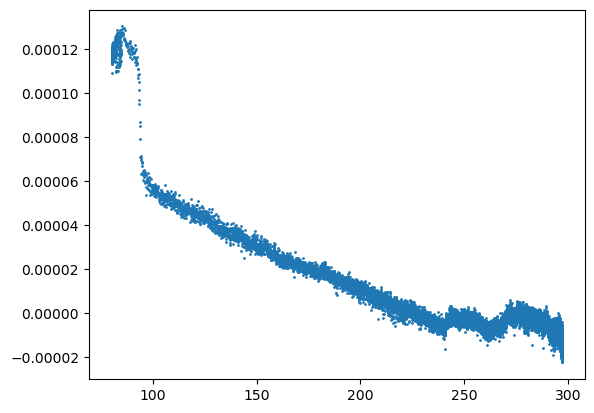

In [265]:
plt.scatter(measurement_06_data[:,5], measurement_06_data[:,4], s =1)

# Auswertungsidee

## Mache zuerst alle Auswertungen für das erste Datenset

1. Show heatin and cooling curve
2. show the averaged voltage against the temperature distinguish between heating and cooling with colours
3. 

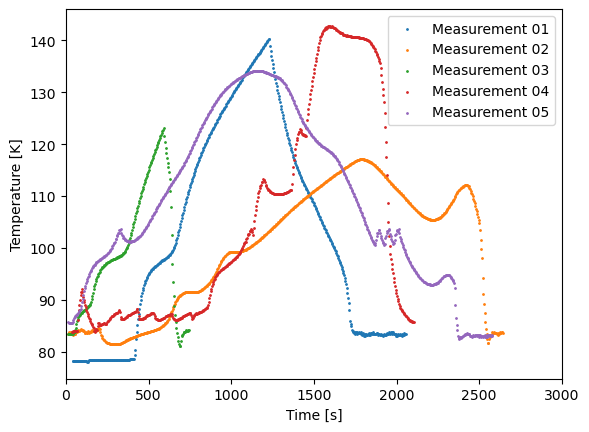

In [266]:
# 1. Show heating and cooling curve
#temperature_uncertainty_01 =  np.abs(measurement_01_data[:,5] - measurement_01_data[:,0])

measurement_01_data_average_temperature = (measurement_01_data[:,0] + measurement_01_data[:,5]) / 2
measurement_02_data_average_temperature = (measurement_02_data[:,0] + measurement_02_data[:,5]) / 2
measurement_03_data_average_temperature = (measurement_03_data[:,0] + measurement_03_data[:,5]) / 2
measurement_04_data_average_temperature = (measurement_04_data[:,0] + measurement_04_data[:,5]) / 2
measurement_05_data_average_temperature = (measurement_05_data[:,0] + measurement_05_data[:,5]) / 2
measurement_06_data_average_temperature = (measurement_06_data[:,0] + measurement_06_data[:,5]) / 2


plt.scatter(measurement_01_data[:,7],measurement_01_data_average_temperature, s = 1)
plt.scatter(measurement_02_data[:,7],measurement_02_data_average_temperature, s = 1)
plt.scatter(measurement_03_data[:,7],measurement_03_data_average_temperature, s = 1)
plt.scatter(measurement_04_data[:,7],measurement_04_data_average_temperature, s = 1)
plt.scatter(measurement_05_data[:,7],measurement_05_data_average_temperature, s = 1)

#add error bars to the plot
plt.errorbar(measurement_01_data[:,7],measurement_01_data_average_temperature, fmt = 'none')



plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.xlim(0, 3000)
plt.legend(['Measurement 01', 'Measurement 02', 'Measurement 03', 'Measurement 04', 'Measurement 05'], loc = 'upper '
                                                                                                          'right')
plt.savefig('heating_cooling_curve_01_05.png')
plt.show()




## Discussion
The heatin and cooling curves are pretty inconsistent due to some handling problems with the measurement device 
setting and restting the goal temperature was not very helpfull to get a consistent curve.

It should not matter that much for the further analysis, since the volatage is only dependent on the temperature and 
not on the time.$

## Error bars not plotted because versy small would oly make it unreadable



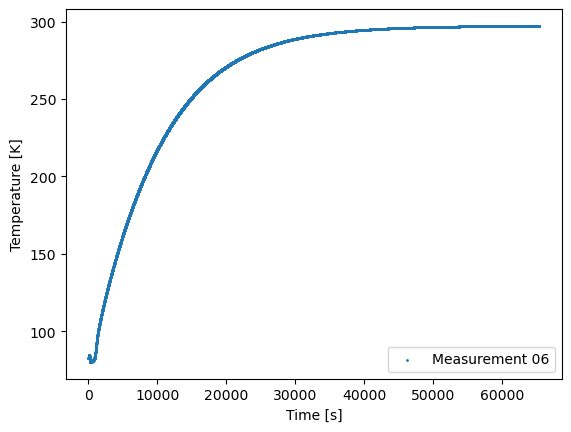

In [267]:
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.scatter(measurement_06_data[:,7],measurement_06_data_average_temperature, s = 1)
plt.savefig('heating_cooling_curve_06.png')
plt.legend(['Measurement 06'], loc = 'lower right')
plt.show()

## Discussion
The measurement number 6 was interrupted and the goal temperature was reset. This is why the curve is complete the 
other one ran over night and is a complete curve.

# Analysis of the raw data to see if the data is usable
- split the data into heating and cooling
- show the voltages against time
- show the voltages of V+ and V- against the temperature
- for all 6 different measurements
- 

In [268]:
#split the data into heating and cooling
#index of the maximal temperature
max_temperature_index_01 = np.argmax(measurement_01_data_average_temperature)
max_temperature_index_02 = np.argmax(measurement_02_data_average_temperature)
max_temperature_index_03 = np.argmax(measurement_03_data_average_temperature)
max_temperature_index_04 = np.argmax(measurement_04_data_average_temperature)
max_temperature_index_05 = np.argmax(measurement_05_data_average_temperature)
max_temperature_index_06 = np.argmax(measurement_06_data_average_temperature)

heating_data_01 = measurement_01_data[:max_temperature_index_01]
cooling_data_01 = measurement_01_data[max_temperature_index_01:]

heating_data_02 = measurement_02_data[:max_temperature_index_02]
cooling_data_02 = measurement_02_data[max_temperature_index_02:]

heating_data_03 = measurement_03_data[:max_temperature_index_03]
cooling_data_03 = measurement_03_data[max_temperature_index_03:]

heating_data_04 = measurement_04_data[:max_temperature_index_04]
cooling_data_04 = measurement_04_data[max_temperature_index_04:]

heating_data_05 = measurement_05_data[:max_temperature_index_05]
cooling_data_05 = measurement_05_data[max_temperature_index_05:]

heating_data_06 = measurement_06_data


# Analysis of V+ against time

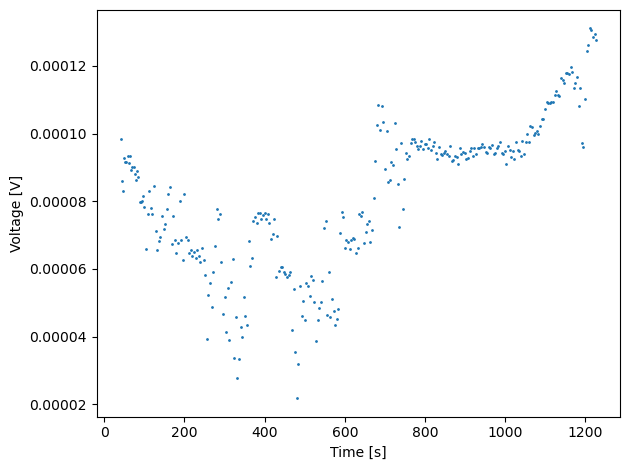

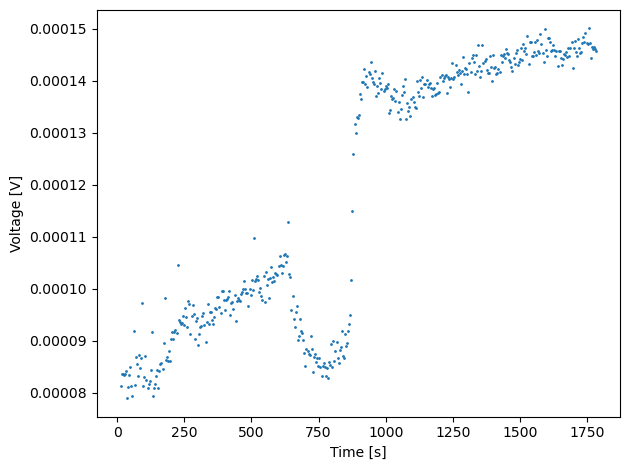

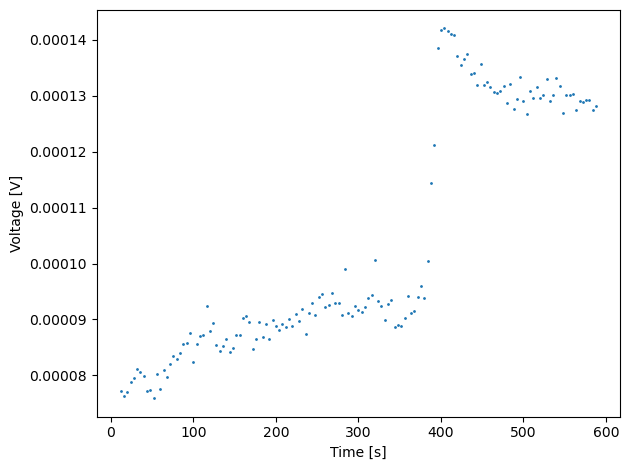

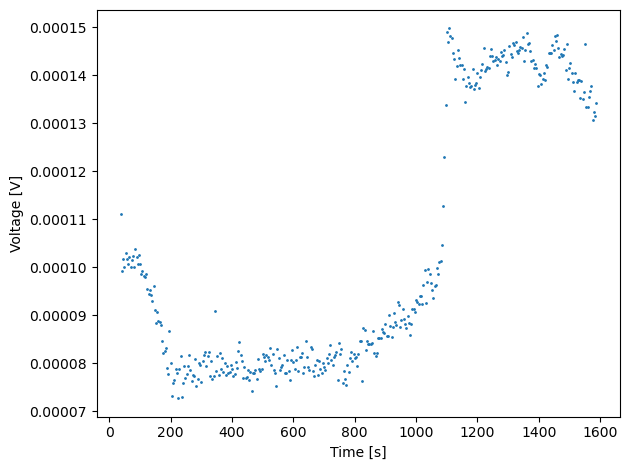

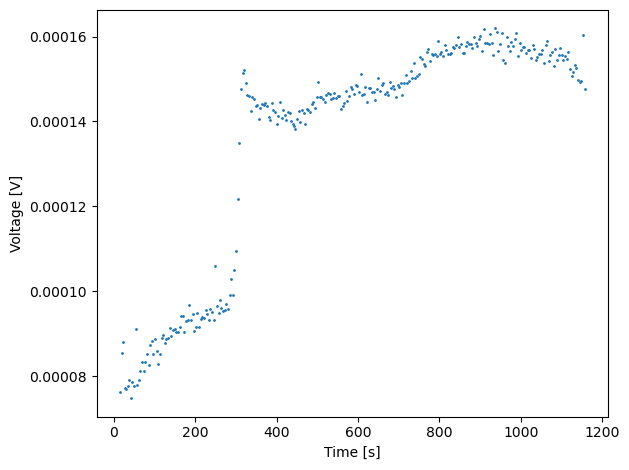

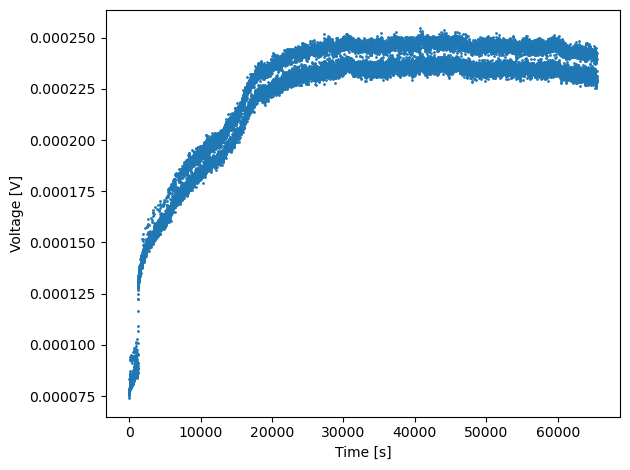

In [269]:
#plot the voltage V+ against the time for the heating and cooling data only for heating
titles = ['heating_time_vs_voltage_01_Vplus.png', 'heating_time_vs_voltage_02_Vplus.png', 'heating_time_vs_voltage_03_Vplus.png',
          'heating_time_vs_voltage_04_Vplus.png', 'heating_time_vs_voltage_05_Vplus.png', 'heating_time_vs_voltage_06_Vplus.png']
titles = titles[::-1]
for data in [heating_data_01, heating_data_02, heating_data_03, heating_data_04, heating_data_05, heating_data_06] :
    plt.scatter(data[:,7], data[:,2], s = 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    #invert title array
    plt.tight_layout()
    plt.savefig(titles.pop())
    plt.show()




# plot the voltage V- against the time for heating


78.183 140.234


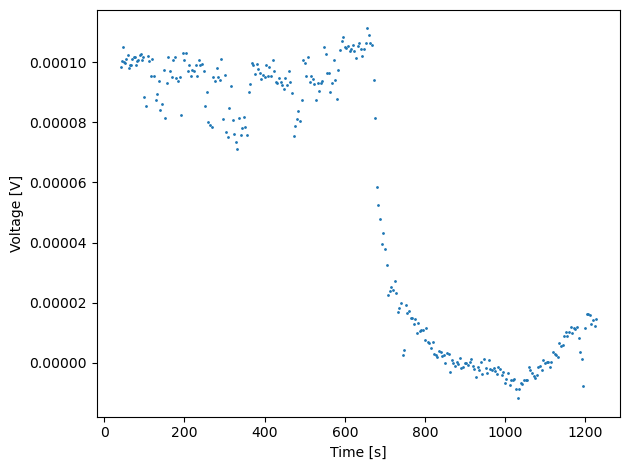

83.484 117.088


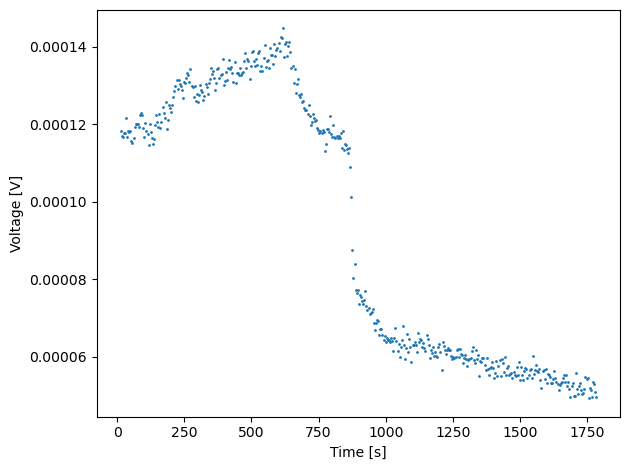

83.528 122.835


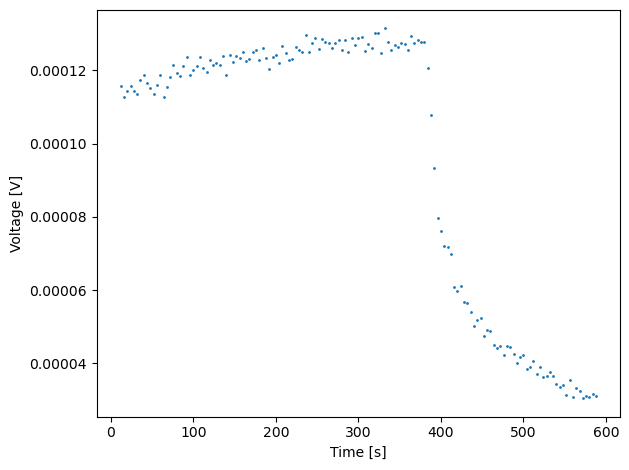

83.87 142.527


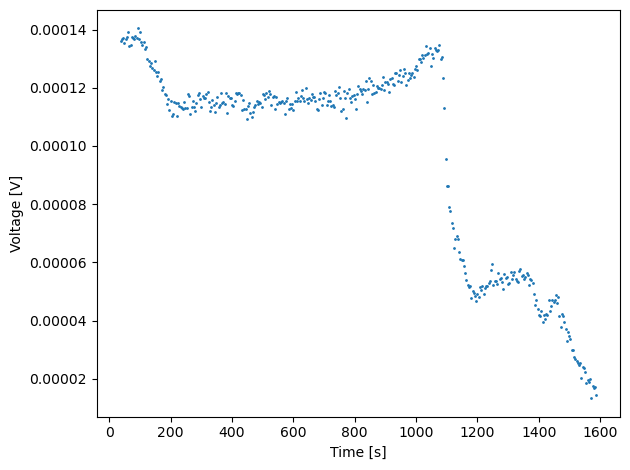

85.688 134.172


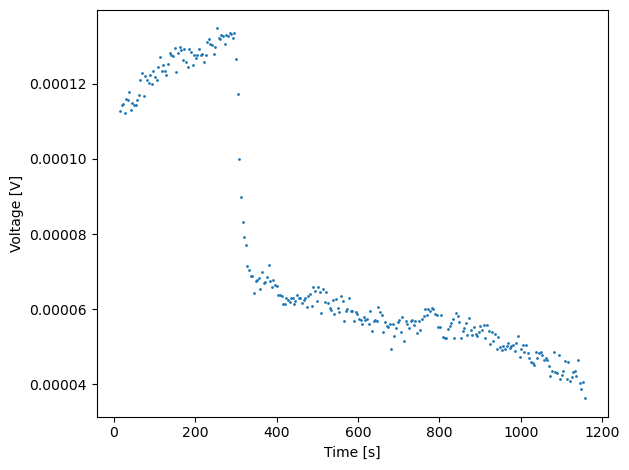

82.602 297.158


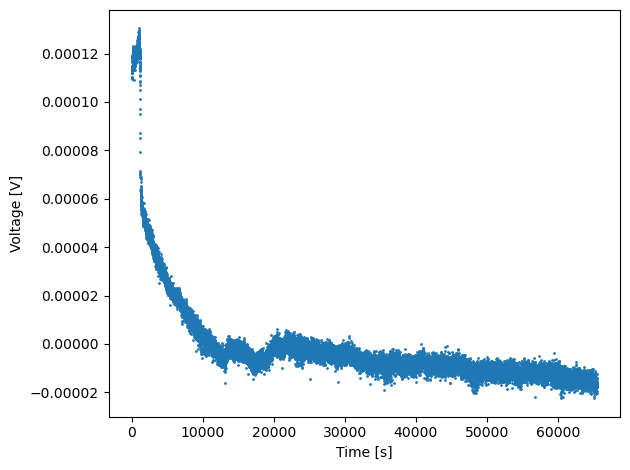

In [270]:
#plot the voltage V- against the time for the heating and cooling data only for heating
titles = ['heating_time_vs_voltage_01_Vminus.png', 'heating_time_vs_voltage_02_Vminus.png', 
          'heating_time_vs_voltage_03_Vminus.png', 'heating_time_vs_voltage_04_Vminus.png', 'heating_time_vs_voltage_05_Vminus.png', 'heating_time_vs_voltage_06_Vminus.png']
titles = titles[::-1]
for data in [heating_data_01, heating_data_02, heating_data_03, heating_data_04, heating_data_05, heating_data_06] :
    #print the value of the temperature first and last
    print(data[0,5], data[-1,5])
    plt.scatter(data[:,7], data[:,4], s = 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    #invert title array
    
    plt.tight_layout()
    plt.savefig(titles.pop())
    plt.show()
    

## Discussion for the heating data 
# V+
- the first times heating does not make sense because the curve is very noisy, probably some problem there
- all the other curves look pretty good and can be used for further analysis
# V-
- all the plots are shifted by approximatly 0.0001 V to the top 
- all five measuurements look feasible

# Analysis of the cooling data
## V+

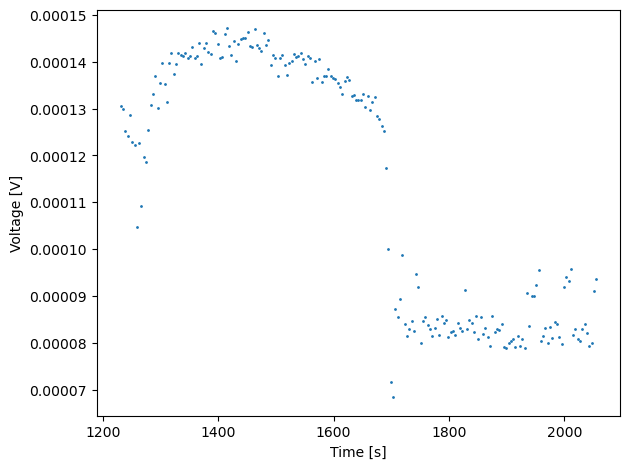

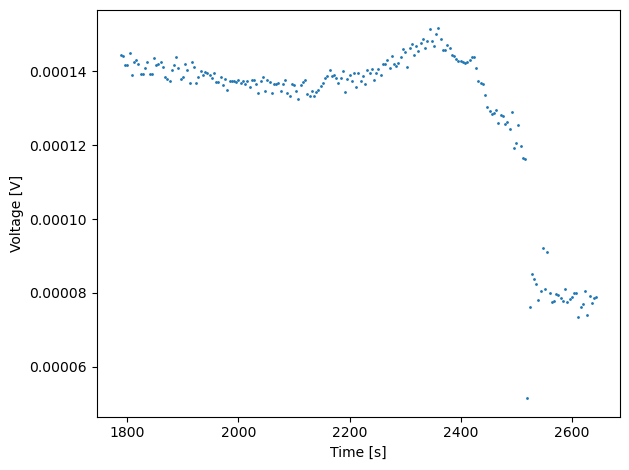

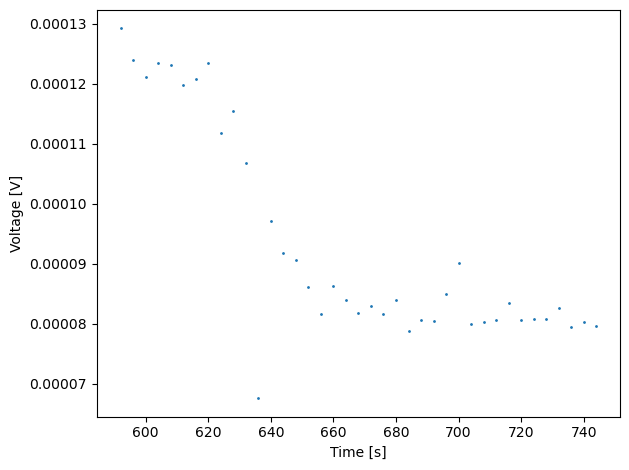

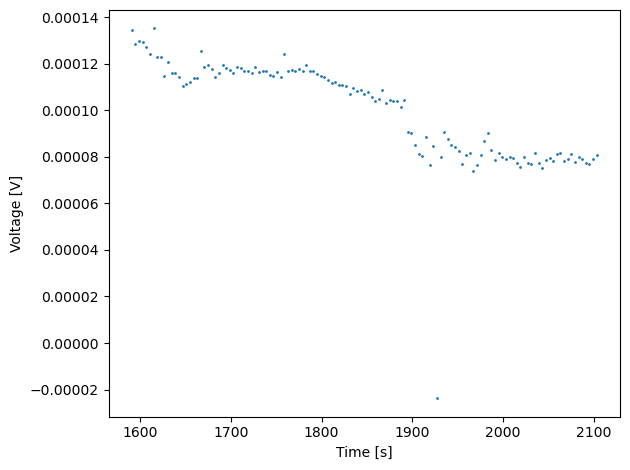

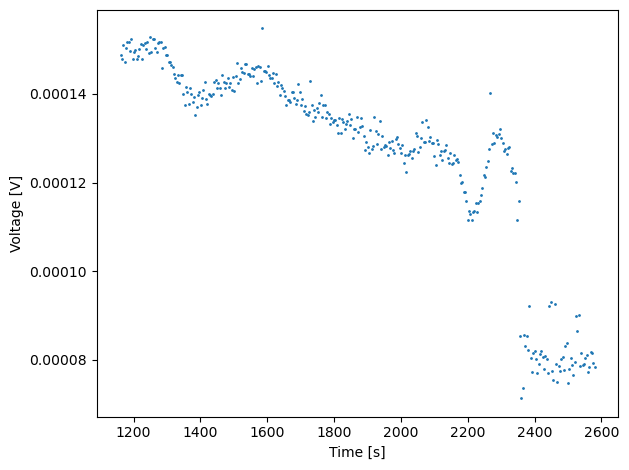

In [271]:
#plot the voltage V+ against the time for cooling
titles = ['cooling_time_vs_voltage_01_Vplus.png', 'cooling_time_vs_voltage_02_Vplus.png', 'cooling_time_vs_voltage_03_Vplus.png',
            'cooling_time_vs_voltage_04_Vplus.png', 'cooling_time_vs_voltage_05_Vplus.png']
titles = titles[::-1]

for data in [cooling_data_01, cooling_data_02, cooling_data_03, cooling_data_04, cooling_data_05] :
    plt.scatter(data[:,7], data[:,2], s = 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.tight_layout()
    plt.savefig(titles.pop())
   
    plt.show()

# V- against the time for cooling

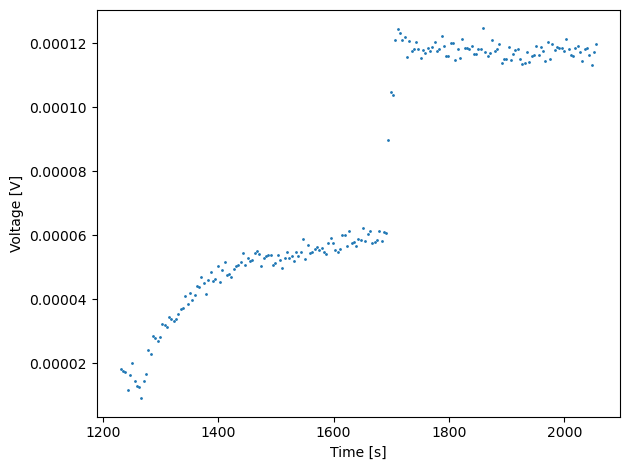

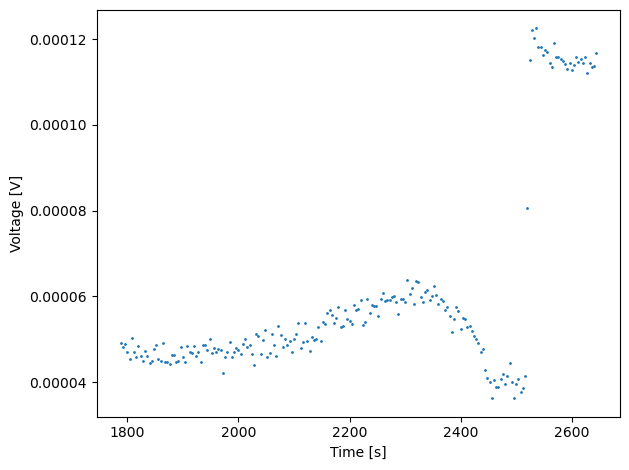

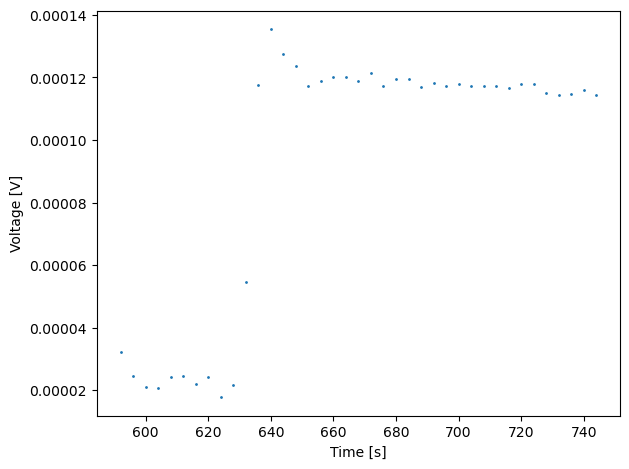

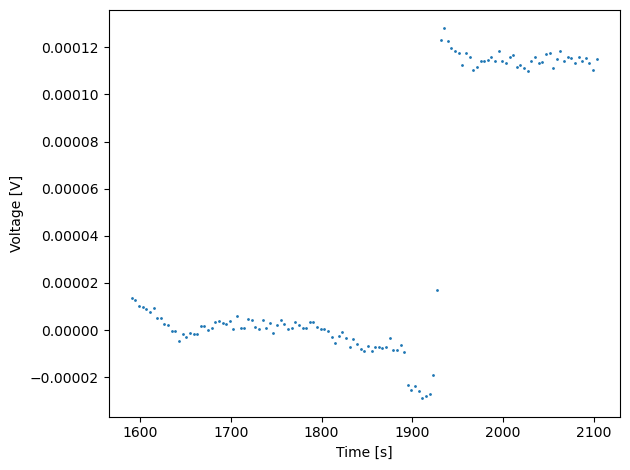

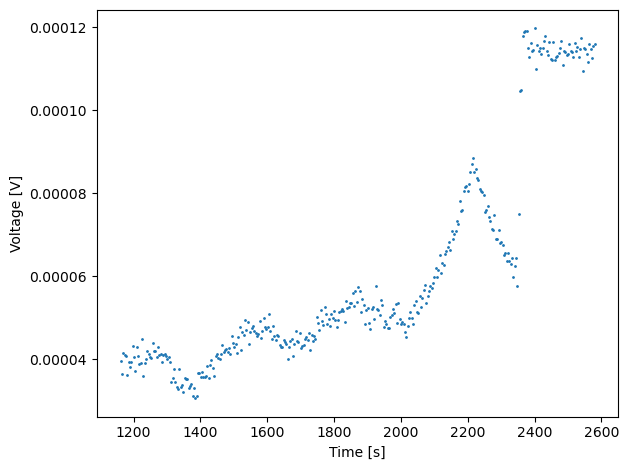

In [272]:
titles = ['cooling_time_vs_voltage_01_Vminus.png', 'cooling_time_vs_voltage_02_Vminus.png', 'cooling_time_vs_voltage_03_Vminus.png',
            'cooling_time_vs_voltage_04_Vminus.png', 'cooling_time_vs_voltage_05_Vminus.png']
titles = titles[::-1]
for data in [cooling_data_01, cooling_data_02, cooling_data_03, cooling_data_04, cooling_data_05] :
    plt.scatter(data[:,7], data[:,4], s = 1)
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.tight_layout()
    plt.savefig(titles.pop())
    plt.show()

## Discussion for the cooling data
# V +
- the cooling data looks pretty good and can be used for further analysis
- ecept for number 4 there is not much difference but still the data is usable
# V-
- The cooling data looks as if with a lower temperature the voltage is higher
- but that shoul no be the case, therefore the data is flipped and shifted by 0.0001 V 

# Results of the analysis of the raw data
- We do not use measurement number 1 for analysisi because its V+ data is very noisy
- The other measurements can be used for further analysis
- The V- data is flipped and shifted by 0.0001 V
- 

# Analysis of the voltage vs. temperature data
- plot the original data of the voltage against the temperature
- bin the data into small bins for the temperature and then show how they look


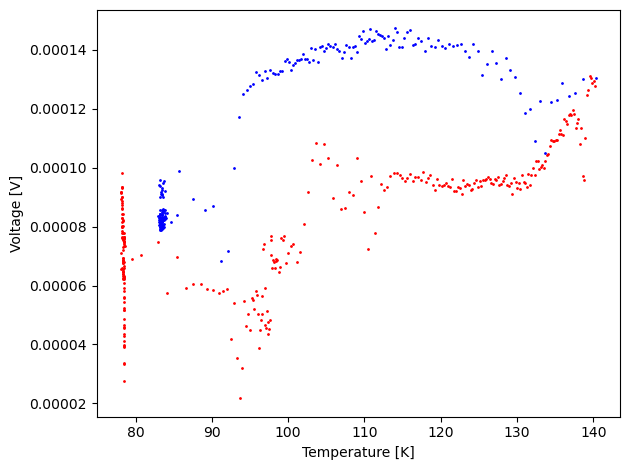

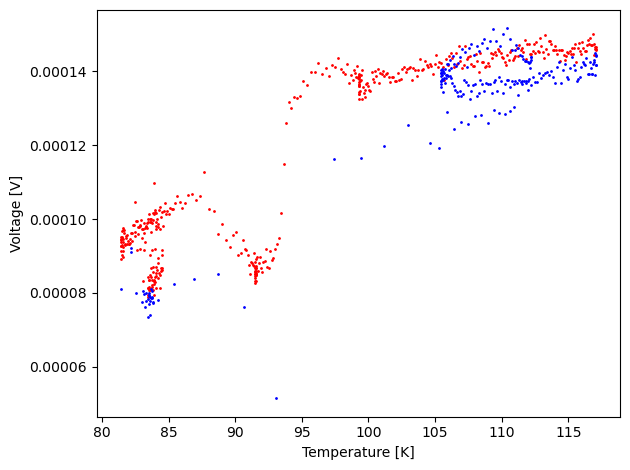

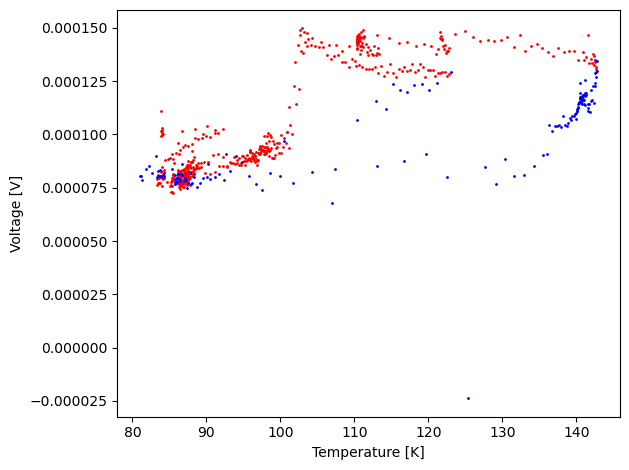

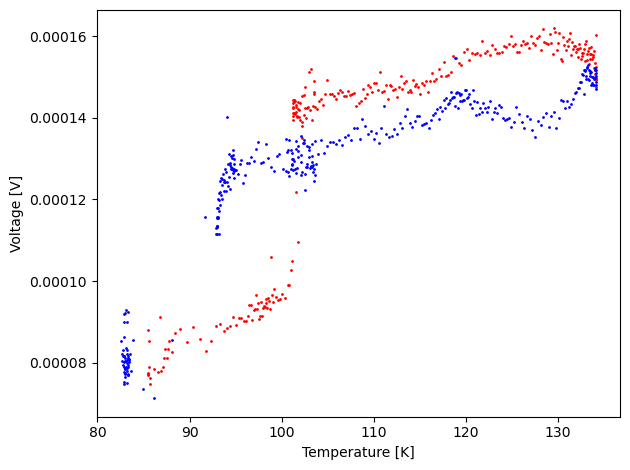

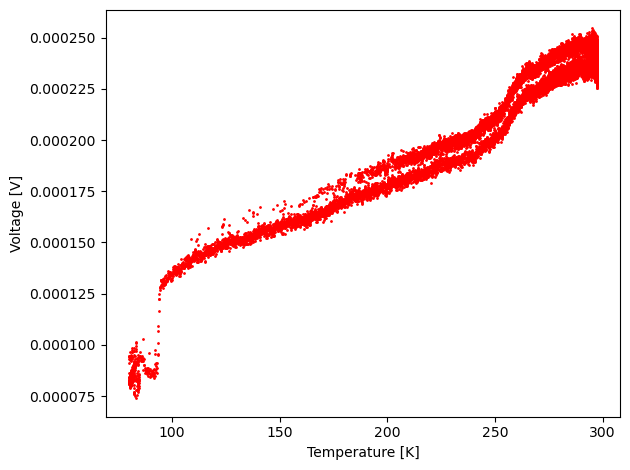

In [273]:
#plot the two curves measured by V+ against the temperature for the one without magnetic field
#red denotes heating and blue cooling
plt.scatter(heating_data_01[:,5], heating_data_01[:,2], s = 1, color = 'red')
plt.scatter(cooling_data_01[:,5], cooling_data_01[:,2], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_cooling_curve_01_Vplus.png')
plt.show()

plt.scatter(heating_data_02[:,5], heating_data_02[:,2], s = 1, color = 'red')
plt.scatter(cooling_data_02[:,5], cooling_data_02[:,2], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_cooling_curve_02_Vplus.png')
plt.show()

#create that plot for all the measurements
plt.scatter(heating_data_03[:,5], heating_data_03[:,2], s = 1, color = 'red')
plt.scatter(cooling_data_03[:,5], cooling_data_03[:,2], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()

plt.savefig('heating_cooling_curve_03_Vplus.png')


#same for measurement 3 and 4 with the magnetic field
plt.scatter(heating_data_04[:,5], heating_data_04[:,2], s = 1, color = 'red')
plt.scatter(cooling_data_04[:,5], cooling_data_04[:,2], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_cooling_curve_04_Vplus.png')
plt.show()

plt.scatter(heating_data_05[:,5], heating_data_05[:,2], s = 1, color = 'red')
plt.scatter(cooling_data_05[:,5], cooling_data_05[:,2], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_cooling_curve_05_Vplus.png')
plt.show()

#plot for the overnight measurement
plt.scatter(heating_data_06[:,5], heating_data_06[:,2], s = 1, color = 'red')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_cooling_curve_06_Vplus.png')
plt.show()


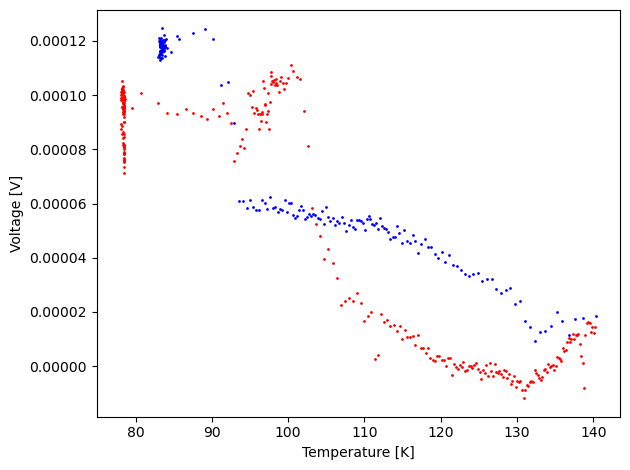

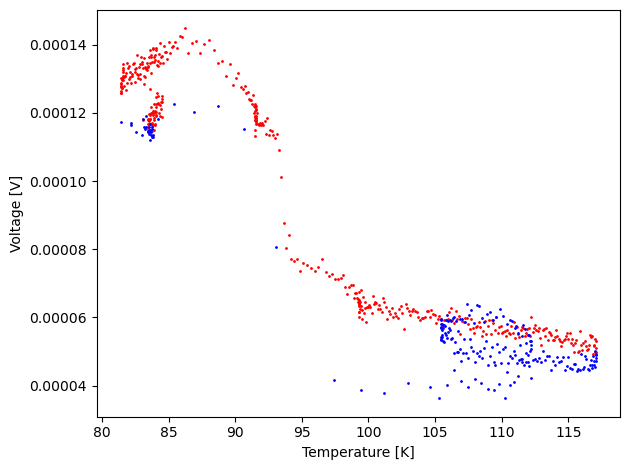

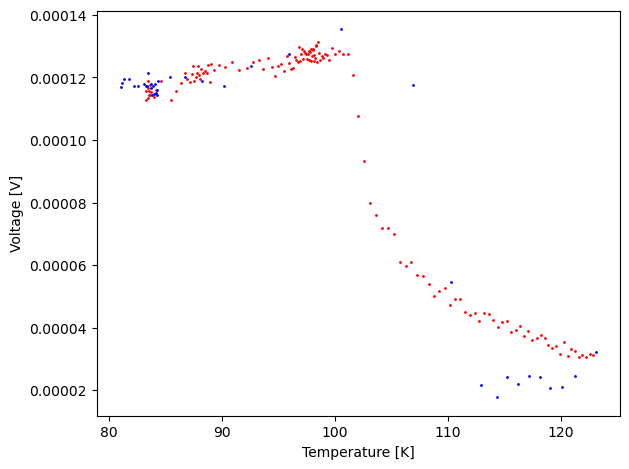

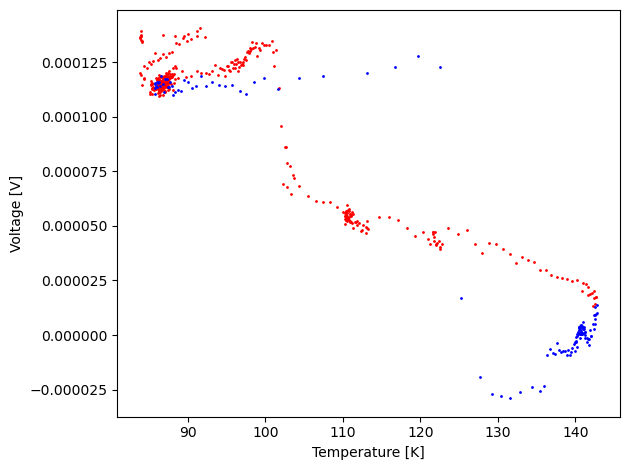

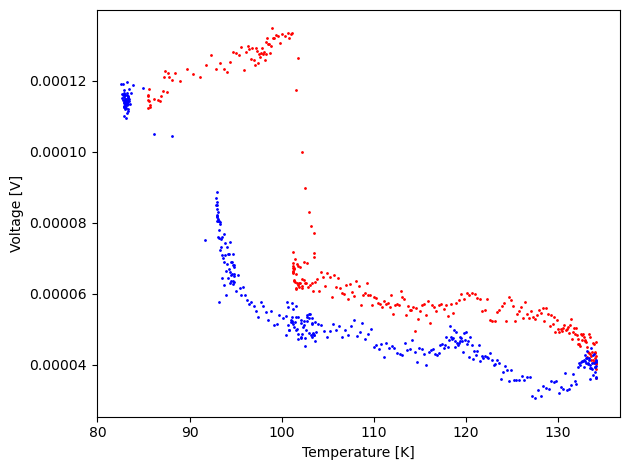

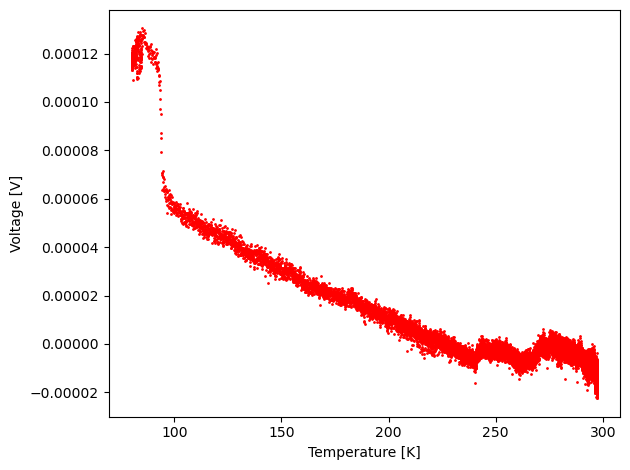

In [274]:
#do the same    for the V-
#plot
plt.scatter(heating_data_01[:,5], heating_data_01[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_01[:,5], cooling_data_01[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_cooling_curve_01_Vminus.png')

plt.show()

plt.scatter(heating_data_02[:,5], heating_data_02[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_02[:,5], cooling_data_02[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_cooling_curve_02_Vminus.png')
plt.show()

#create that plot for all the measurement
plt.scatter(heating_data_03[:,5], heating_data_03[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_03[:,5], cooling_data_03[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_cooling_curve_03_Vminus.png')
plt.show()

plt.scatter(heating_data_04[:,5], heating_data_04[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_04[:,5], cooling_data_04[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')

plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_cooling_curve_04_Vminus.png')
plt.show()

plt.scatter(heating_data_05[:,5], heating_data_05[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_05[:,5], cooling_data_05[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_cooling_curve_05_Vminus.png')
plt.show()

plt.scatter(heating_data_06[:,5], heating_data_06[:,4], s = 1, color = 'red')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_cooling_curve_06_Vminus.png')
plt.show()



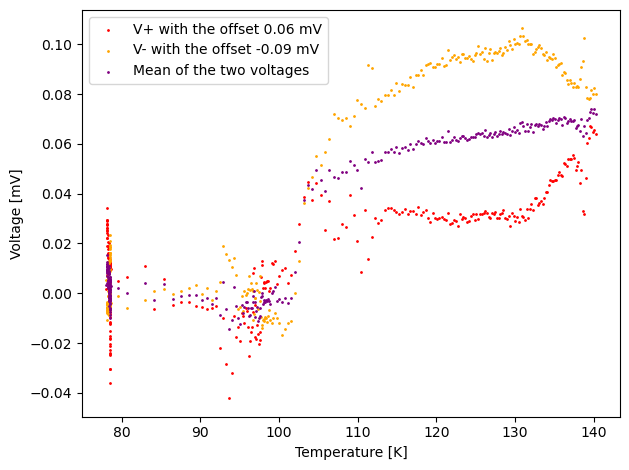

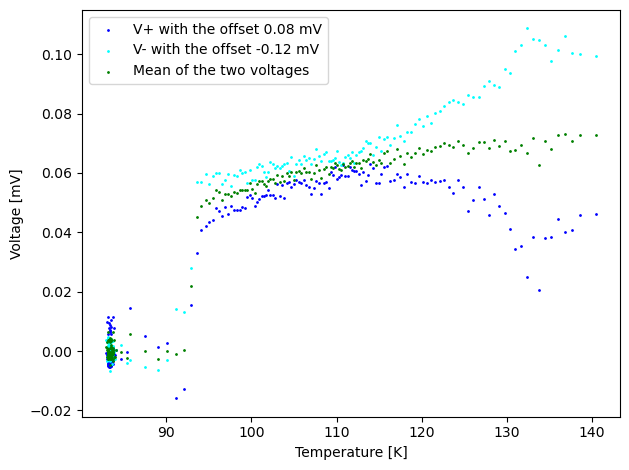

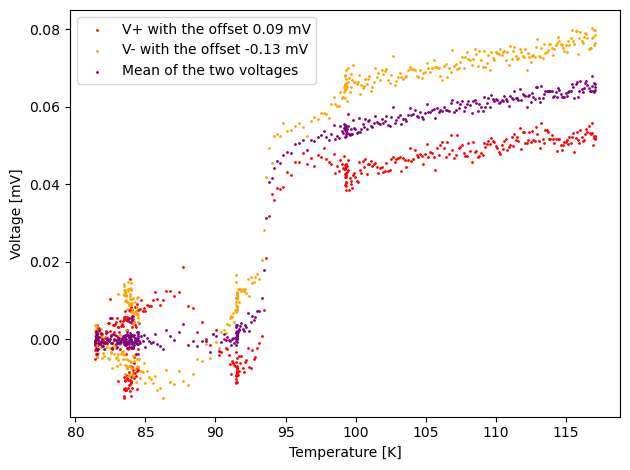

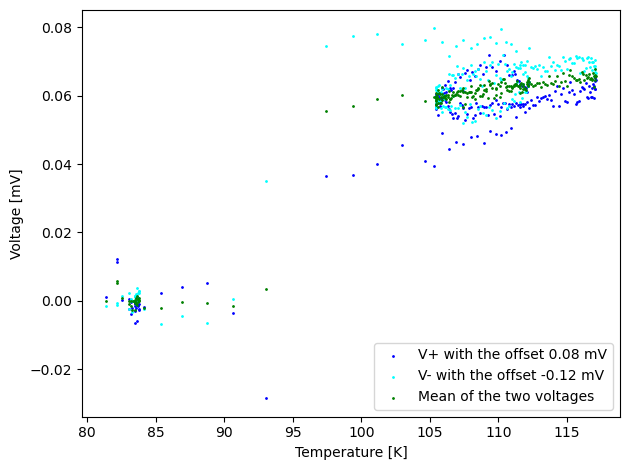

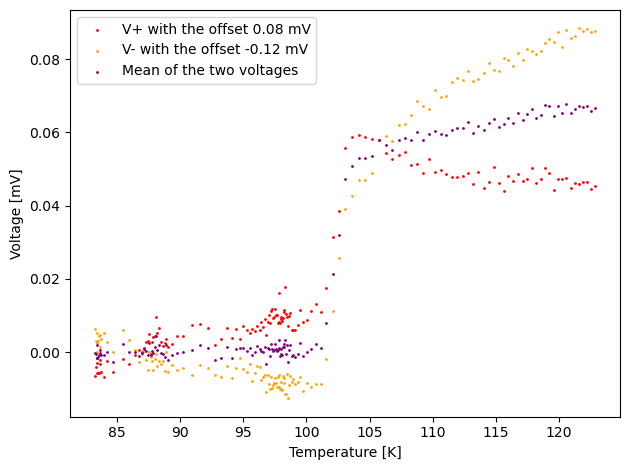

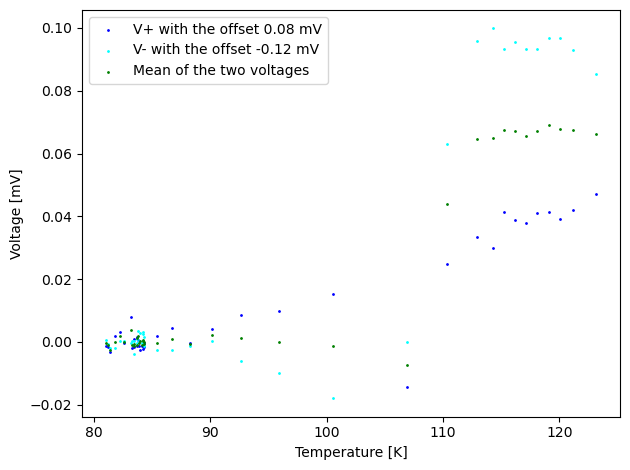

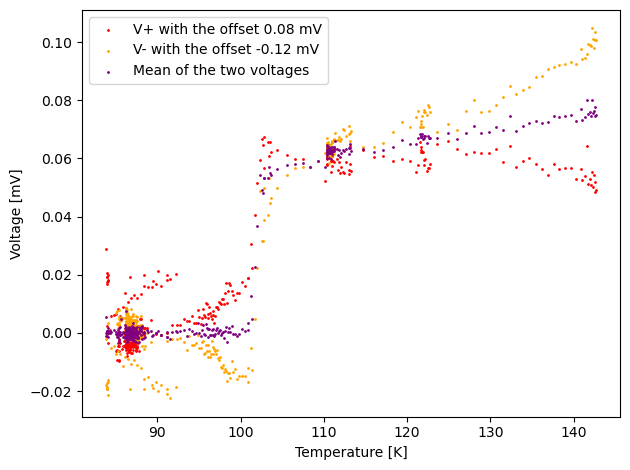

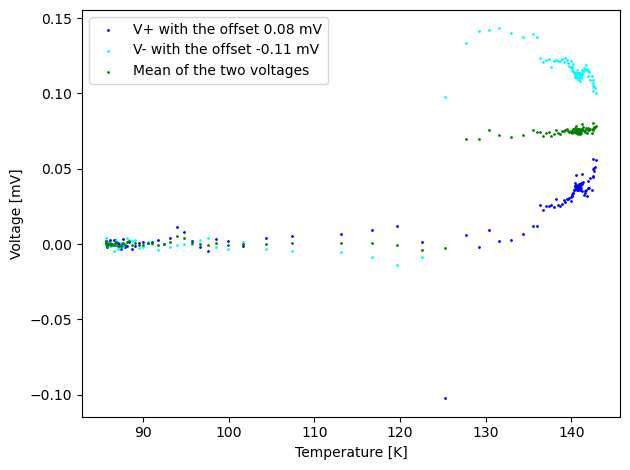

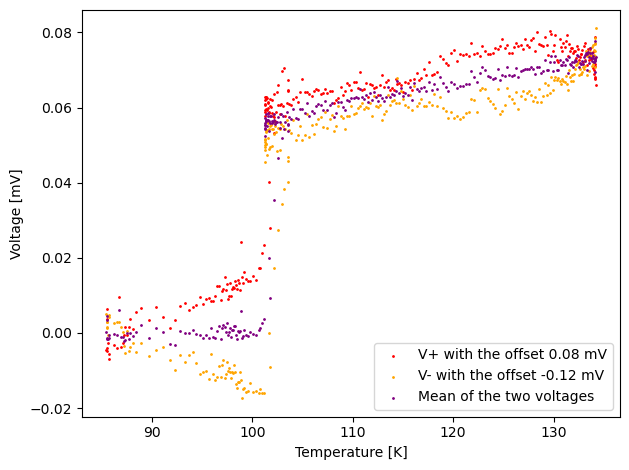

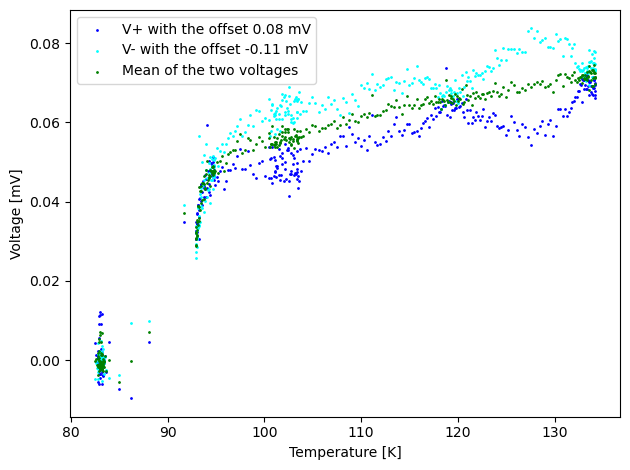

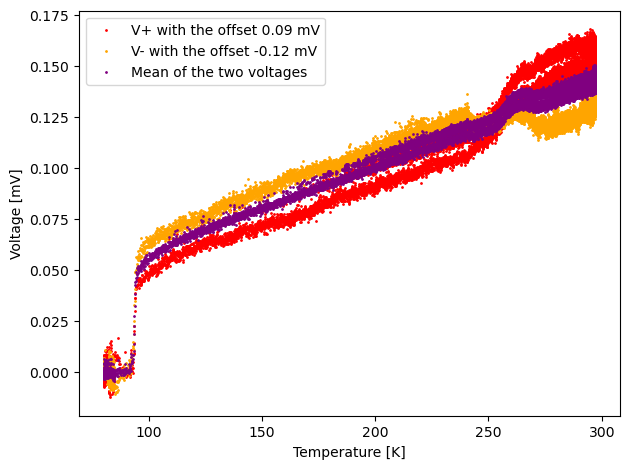

In [275]:

# we adjust the plots of the Voltage V- as a function of the Temperature, by flipping and with a fixed y-axis offset, such that they are more easily comparable

def normalize_data(input_dataset_temperature, input_dataset_voltage):
    
    temperature_minimum = 80
    temperature_cutoff = 90
    evaluation_array = []

    # calculate the mean voltage for data points below the critical temperature, about 80 K to 90 K
    for i in range(len(input_dataset_temperature)):
    
        if input_dataset_temperature[i] < temperature_cutoff:
            
            if input_dataset_temperature[i] > temperature_minimum: 
                    
                evaluation_array.append(input_dataset_voltage[i])
        
    y_offset = np.mean(evaluation_array)
    
    # add the y-axis offset to the whole data set
    normalized_dataset_voltages = input_dataset_voltage - y_offset
    
    return normalized_dataset_voltages, y_offset

# first we flip all data sets, where the curve is in the negative voltage range and turn it into mV (before was in V)
heating_voltages_Vplus_flipped_01 = 1000 * heating_data_01[:,2]
heating_voltages_Vminus_flipped_01 = -1000 * heating_data_01[:,4]

cooling_voltages_Vplus_flipped_01 = 1000 * cooling_data_01[:,2]
cooling_voltages_Vminus_flipped_01 = -1000 * cooling_data_01[:,4]

# normalizing the plots, such that the voltage below the critical temperature is always around 0 V
heating_voltages_Vplus_normalized_01, heating_Vplus_offset_01 = normalize_data(heating_data_01[:,5], heating_voltages_Vplus_flipped_01)
heating_voltages_Vminus_normalized_01, heating_Vminus_offset_01 = normalize_data(heating_data_01[:,5], heating_voltages_Vminus_flipped_01)

cooling_voltages_Vplus_normalized_01, cooling_Vplus_offset_01 = normalize_data(cooling_data_01[:,5], cooling_voltages_Vplus_flipped_01)
cooling_voltages_Vminus_normalized_01, cooling_Vminus_offset_01 = normalize_data(cooling_data_01[:,5], cooling_voltages_Vminus_flipped_01)

# calculating the mean of the two voltages
heating_voltages_mean_normalized_01 = (heating_voltages_Vplus_normalized_01 + heating_voltages_Vminus_normalized_01) / 2

cooling_voltages_mean_normalized_01 = (cooling_voltages_Vplus_normalized_01 + cooling_voltages_Vminus_normalized_01) / 2

# create the plots of heating and cooling in different plots but V+ and V- in the same plot to compare
plt.scatter(heating_data_01[:,5], heating_voltages_Vplus_normalized_01, s = 1, color = 'red', label = f"V+ with the offset {heating_Vplus_offset_01:.2f} mV")
plt.scatter(heating_data_01[:,5], heating_voltages_Vminus_normalized_01, s = 1, color = 'orange', label = f"V- with the offset {heating_Vminus_offset_01:.2f} mV")

plt.scatter(heating_data_01[:,5], heating_voltages_mean_normalized_01, s = 1, color = 'purple', label = f"Mean of the two voltages")

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.legend()

plt.tight_layout()
plt.savefig('heating_curves_01_normalized.png')

plt.show()


plt.scatter(cooling_data_01[:,5], cooling_voltages_Vplus_normalized_01, s = 1, color = 'blue', label = f"V+ with the offset {cooling_Vplus_offset_01:.2f} mV")
plt.scatter(cooling_data_01[:,5], cooling_voltages_Vminus_normalized_01, s = 1, color = 'cyan', label = f"V- with the offset {cooling_Vminus_offset_01:.2f} mV")

plt.scatter(cooling_data_01[:,5], cooling_voltages_mean_normalized_01, s = 1, color = 'green', label = f"Mean of the two voltages")

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.legend()

plt.tight_layout()
plt.savefig('cooling_curves_01_normalized.png')

plt.show()

# now this will be very ugly ...
# do the same for measurement set 2
heating_voltages_Vplus_flipped_02 = 1000 * heating_data_02[:,2]
heating_voltages_Vminus_flipped_02 = -1000 * heating_data_02[:,4]

cooling_voltages_Vplus_flipped_02 = 1000 * cooling_data_02[:,2]
cooling_voltages_Vminus_flipped_02 = -1000 * cooling_data_02[:,4]

# normalizing the plots, such that the voltage below the critical temperature is always around 0 V
heating_voltages_Vplus_normalized_02, heating_Vplus_offset_02 = normalize_data(heating_data_02[:,5], heating_voltages_Vplus_flipped_02)
heating_voltages_Vminus_normalized_02, heating_Vminus_offset_02 = normalize_data(heating_data_02[:,5], heating_voltages_Vminus_flipped_02)

cooling_voltages_Vplus_normalized_02, cooling_Vplus_offset_02 = normalize_data(cooling_data_02[:,5], cooling_voltages_Vplus_flipped_02)
cooling_voltages_Vminus_normalized_02, cooling_Vminus_offset_02 = normalize_data(cooling_data_02[:,5], cooling_voltages_Vminus_flipped_02)

# calculating the mean of the two voltages
heating_voltages_mean_normalized_02 = (heating_voltages_Vplus_normalized_02 + heating_voltages_Vminus_normalized_02) / 2

cooling_voltages_mean_normalized_02 = (cooling_voltages_Vplus_normalized_02 + cooling_voltages_Vminus_normalized_02) / 2

# create the plots of heating and cooling in different plots but V+ and V- in the same plot to compare
plt.scatter(heating_data_02[:,5], heating_voltages_Vplus_normalized_02, s = 1, color = 'red', label = f"V+ with the offset {heating_Vplus_offset_02:.2f} mV")
plt.scatter(heating_data_02[:,5], heating_voltages_Vminus_normalized_02, s = 1, color = 'orange', label = f"V- with the offset {heating_Vminus_offset_02:.2f} mV")

plt.scatter(heating_data_02[:,5], heating_voltages_mean_normalized_02, s = 1, color = 'purple', label = f"Mean of the two voltages")

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')
plt.legend()
plt.tight_layout()
plt.savefig('heating_curves_02_normalized.png')
plt.show()


plt.scatter(cooling_data_02[:,5], cooling_voltages_Vplus_normalized_02, s = 1, color = 'blue', label = f"V+ with the offset {cooling_Vplus_offset_02:.2f} mV")
plt.scatter(cooling_data_02[:,5], cooling_voltages_Vminus_normalized_02, s = 1, color = 'cyan', label = f"V- with the offset {cooling_Vminus_offset_02:.2f} mV")

plt.scatter(cooling_data_02[:,5], cooling_voltages_mean_normalized_02, s = 1, color = 'green', label = f"Mean of the two voltages")

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')
plt.legend()
plt.tight_layout()
plt.savefig('cooling_curves_02_normalized.png')
plt.show()

# for measurement set 3
heating_voltages_Vplus_flipped_03 = 1000 * heating_data_03[:,2]
heating_voltages_Vminus_flipped_03 = -1000 * heating_data_03[:,4]

cooling_voltages_Vplus_flipped_03 = 1000 * cooling_data_03[:,2]
cooling_voltages_Vminus_flipped_03 = -1000 * cooling_data_03[:,4]

# normalizing the plots, such that the voltage below the critical temperature is always around 0 V
heating_voltages_Vplus_normalized_03, heating_Vplus_offset_03 = normalize_data(heating_data_03[:,5], heating_voltages_Vplus_flipped_03)
heating_voltages_Vminus_normalized_03, heating_Vminus_offset_03 = normalize_data(heating_data_03[:,5], heating_voltages_Vminus_flipped_03)

cooling_voltages_Vplus_normalized_03, cooling_Vplus_offset_03 = normalize_data(cooling_data_03[:,5], cooling_voltages_Vplus_flipped_03)
cooling_voltages_Vminus_normalized_03, cooling_Vminus_offset_03 = normalize_data(cooling_data_03[:,5], cooling_voltages_Vminus_flipped_03)

# calculating the mean of the two voltages
heating_voltages_mean_normalized_03 = (heating_voltages_Vplus_normalized_03 + heating_voltages_Vminus_normalized_03) / 2

cooling_voltages_mean_normalized_03 = (cooling_voltages_Vplus_normalized_03 + cooling_voltages_Vminus_normalized_03) / 2

# create the plots of heating and cooling in different plots but V+ and V- in the same plot to compare
plt.scatter(heating_data_03[:,5], heating_voltages_Vplus_normalized_03, s = 1, color = 'red', label = f"V+ with the offset {heating_Vplus_offset_03:.2f} mV")
plt.scatter(heating_data_03[:,5], heating_voltages_Vminus_normalized_03, s = 1, color = 'orange', label = f"V- with the offset {heating_Vminus_offset_03:.2f} mV")

plt.scatter(heating_data_03[:,5], heating_voltages_mean_normalized_03, s = 1, color = 'purple', label = f"Mean of the two voltages")

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')
plt.legend()
plt.tight_layout()
plt.savefig('heating_curves_03_normalized.png')
plt.show()


plt.scatter(cooling_data_03[:,5], cooling_voltages_Vplus_normalized_03, s = 1, color = 'blue', label = f"V+ with the offset {cooling_Vplus_offset_03:.2f} mV")
plt.scatter(cooling_data_03[:,5], cooling_voltages_Vminus_normalized_03, s = 1, color = 'cyan', label = f"V- with the offset {cooling_Vminus_offset_03:.2f} mV")

plt.scatter(cooling_data_03[:,5], cooling_voltages_mean_normalized_03, s = 1, color = 'green', label = f"Mean of the two voltages")

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')
plt.legend()
plt.tight_layout()
plt.savefig('cooling_curves_03_normalized.png')
plt.show()

# for measurement set 4
heating_voltages_Vplus_flipped_04 = 1000 * heating_data_04[:,2]
heating_voltages_Vminus_flipped_04 = -1000 * heating_data_04[:,4]

cooling_voltages_Vplus_flipped_04 = 1000 * cooling_data_04[:,2]
cooling_voltages_Vminus_flipped_04 = -1000 * cooling_data_04[:,4]

# normalizing the plots, such that the voltage below the critical temperature is always around 0 V
heating_voltages_Vplus_normalized_04, heating_Vplus_offset_04 = normalize_data(heating_data_04[:,5], heating_voltages_Vplus_flipped_04)
heating_voltages_Vminus_normalized_04, heating_Vminus_offset_04 = normalize_data(heating_data_04[:,5], heating_voltages_Vminus_flipped_04)

cooling_voltages_Vplus_normalized_04, cooling_Vplus_offset_04 = normalize_data(cooling_data_04[:,5], cooling_voltages_Vplus_flipped_04)
cooling_voltages_Vminus_normalized_04, cooling_Vminus_offset_04 = normalize_data(cooling_data_04[:,5], cooling_voltages_Vminus_flipped_04)

# calculating the mean of the two voltages
heating_voltages_mean_normalized_04 = (heating_voltages_Vplus_normalized_04 + heating_voltages_Vminus_normalized_04) / 2

cooling_voltages_mean_normalized_04 = (cooling_voltages_Vplus_normalized_04 + cooling_voltages_Vminus_normalized_04) / 2

# create the plots of heating and cooling in different plots but V+ and V- in the same plot to compare
plt.scatter(heating_data_04[:,5], heating_voltages_Vplus_normalized_04, s = 1, color = 'red', label = f"V+ with the offset {heating_Vplus_offset_04:.2f} mV")
plt.scatter(heating_data_04[:,5], heating_voltages_Vminus_normalized_04, s = 1, color = 'orange', label = f"V- with the offset {heating_Vminus_offset_04:.2f} mV")

plt.scatter(heating_data_04[:,5], heating_voltages_mean_normalized_04, s = 1, color = 'purple', label = f"Mean of the two voltages")

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')
plt.legend()
plt.tight_layout()
plt.savefig('heating_curves_04_normalized.png')
plt.show()


plt.scatter(cooling_data_04[:,5], cooling_voltages_Vplus_normalized_04, s = 1, color = 'blue', label = f"V+ with the offset {cooling_Vplus_offset_04:.2f} mV")
plt.scatter(cooling_data_04[:,5], cooling_voltages_Vminus_normalized_04, s = 1, color = 'cyan', label = f"V- with the offset {cooling_Vminus_offset_04:.2f} mV")

plt.scatter(cooling_data_04[:,5], cooling_voltages_mean_normalized_04, s = 1, color = 'green', label = f"Mean of the two voltages")

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')
plt.legend()
plt.tight_layout()
plt.savefig('cooling_curves_04_normalized.png')
plt.show()

# for measurement set 5
heating_voltages_Vplus_flipped_05 = 1000 * heating_data_05[:,2]
heating_voltages_Vminus_flipped_05 = -1000 * heating_data_05[:,4]

cooling_voltages_Vplus_flipped_05 = 1000 * cooling_data_05[:,2]
cooling_voltages_Vminus_flipped_05 = -1000 * cooling_data_05[:,4]

# normalizing the plots, such that the voltage below the critical temperature is always around 0 V
heating_voltages_Vplus_normalized_05, heating_Vplus_offset_05 = normalize_data(heating_data_05[:,5], heating_voltages_Vplus_flipped_05)
heating_voltages_Vminus_normalized_05, heating_Vminus_offset_05 = normalize_data(heating_data_05[:,5], heating_voltages_Vminus_flipped_05)

cooling_voltages_Vplus_normalized_05, cooling_Vplus_offset_05 = normalize_data(cooling_data_05[:,5], cooling_voltages_Vplus_flipped_05)
cooling_voltages_Vminus_normalized_05, cooling_Vminus_offset_05 = normalize_data(cooling_data_05[:,5], cooling_voltages_Vminus_flipped_05)

# calculating the mean of the two voltages
heating_voltages_mean_normalized_05 = (heating_voltages_Vplus_normalized_05 + heating_voltages_Vminus_normalized_05) / 2

cooling_voltages_mean_normalized_05 = (cooling_voltages_Vplus_normalized_05 + cooling_voltages_Vminus_normalized_05) / 2

# create the plots of heating and cooling in different plots but V+ and V- in the same plot to compare
plt.scatter(heating_data_05[:,5], heating_voltages_Vplus_normalized_05, s = 1, color = 'red', label = f"V+ with the offset {heating_Vplus_offset_05:.2f} mV")
plt.scatter(heating_data_05[:,5], heating_voltages_Vminus_normalized_05, s = 1, color = 'orange', label = f"V- with the offset {heating_Vminus_offset_05:.2f} mV")

plt.scatter(heating_data_05[:,5], heating_voltages_mean_normalized_05, s = 1, color = 'purple', label = f"Mean of the two voltages")

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')
plt.legend()
plt.tight_layout()
plt.savefig('heating_curves_05_normalized.png')
plt.show()


plt.scatter(cooling_data_05[:,5], cooling_voltages_Vplus_normalized_05, s = 1, color = 'blue', label = f"V+ with the offset {cooling_Vplus_offset_05:.2f} mV")
plt.scatter(cooling_data_05[:,5], cooling_voltages_Vminus_normalized_05, s = 1, color = 'cyan', label = f"V- with the offset {cooling_Vminus_offset_05:.2f} mV")

plt.scatter(cooling_data_05[:,5], cooling_voltages_mean_normalized_05, s = 1, color = 'green', label = f"Mean of the two voltages")

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')
plt.legend()
plt.tight_layout()
plt.savefig('cooling_curves_05_normalized.png')
plt.show()

# for measurement set 6
heating_voltages_Vplus_flipped_06 = 1000 * heating_data_06[:,2]
heating_voltages_Vminus_flipped_06 = -1000 * heating_data_06[:,4]

# normalizing the plots, such that the voltage below the critical temperature is always around 0 V
heating_voltages_Vplus_normalized_06, heating_Vplus_offset_06 = normalize_data(heating_data_06[:,5], heating_voltages_Vplus_flipped_06)
heating_voltages_Vminus_normalized_06, heating_Vminus_offset_06 = normalize_data(heating_data_06[:,5], heating_voltages_Vminus_flipped_06)

# calculating the mean of the two voltages
heating_voltages_mean_normalized_06 = (heating_voltages_Vplus_normalized_06 + heating_voltages_Vminus_normalized_06) / 2

# create the plots of heating and cooling in different plots but V+ and V- in the same plot to compare
plt.scatter(heating_data_06[:,5], heating_voltages_Vplus_normalized_06, s = 1, color = 'red', label = f"V+ with the offset {heating_Vplus_offset_06:.2f} mV")
plt.scatter(heating_data_06[:,5], heating_voltages_Vminus_normalized_06, s = 1, color = 'orange', label = f"V- with the offset {heating_Vminus_offset_06:.2f} mV")

plt.scatter(heating_data_06[:,5], heating_voltages_mean_normalized_06, s = 1, color = 'purple', label = f"Mean of the two voltages")

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')
plt.legend()
plt.tight_layout()
plt.savefig('heating_curves_06_normalized.png')
plt.show()


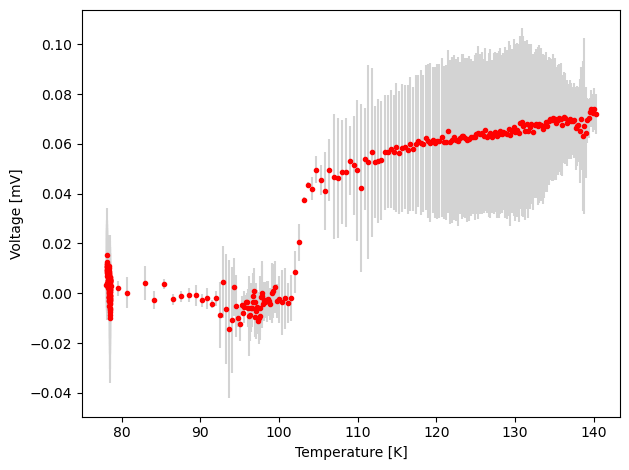

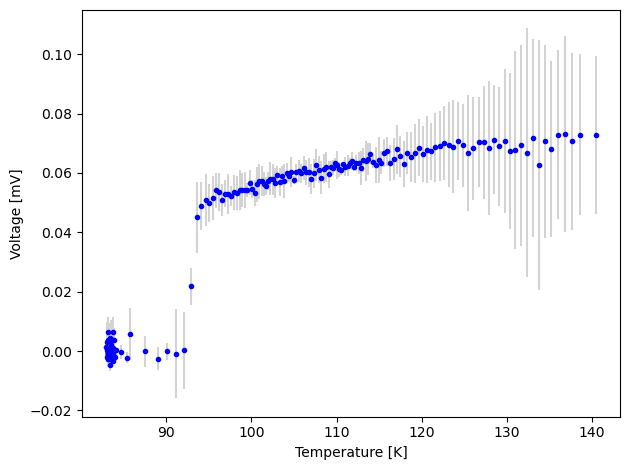

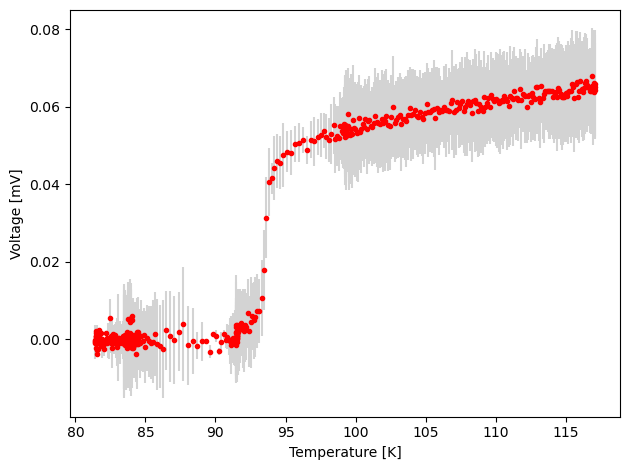

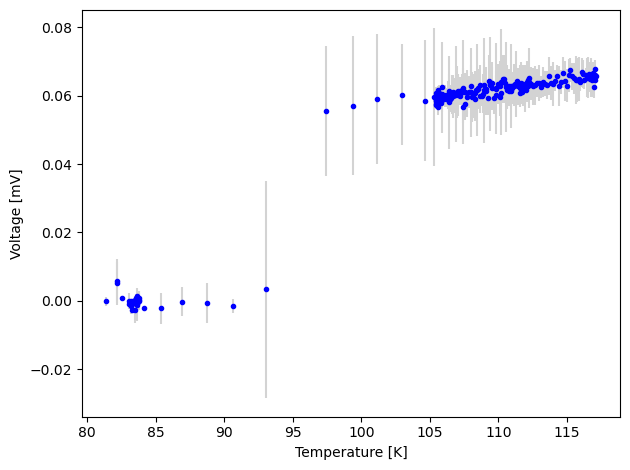

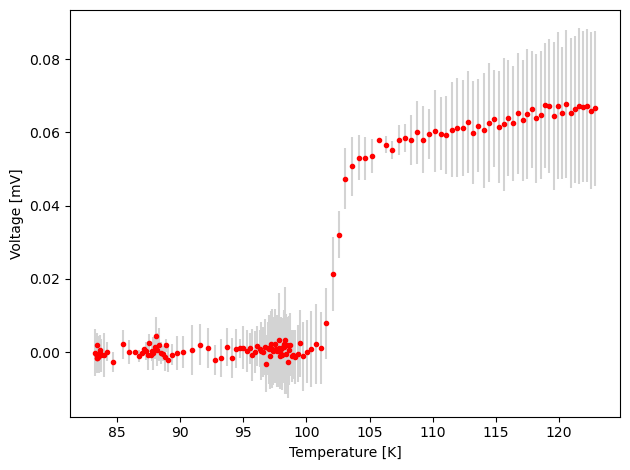

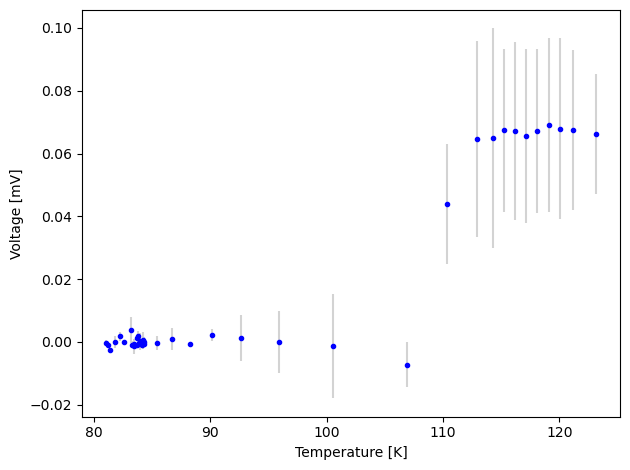

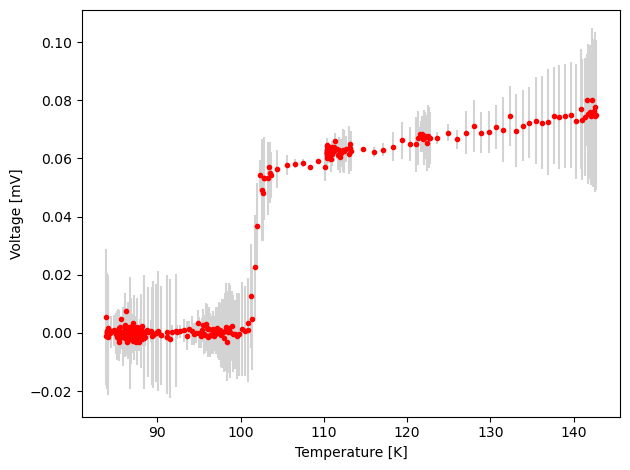

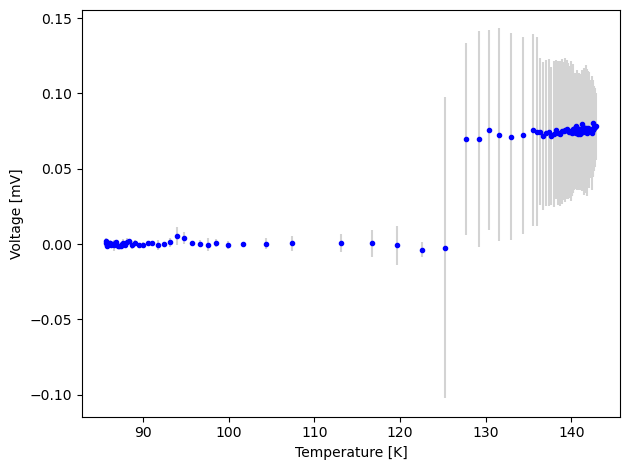

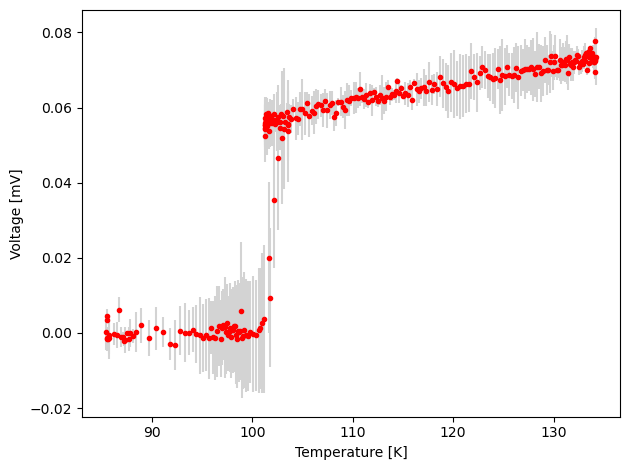

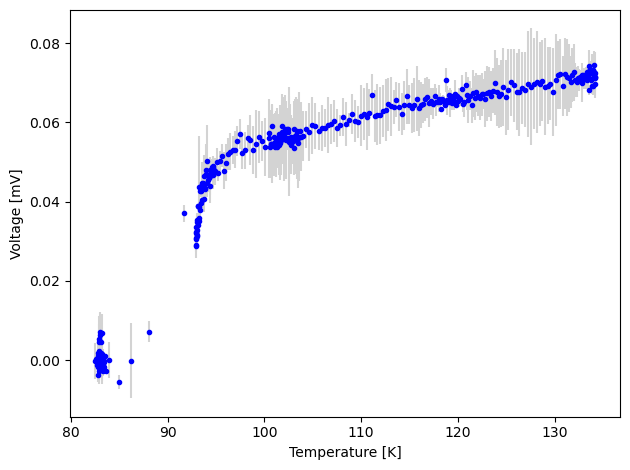

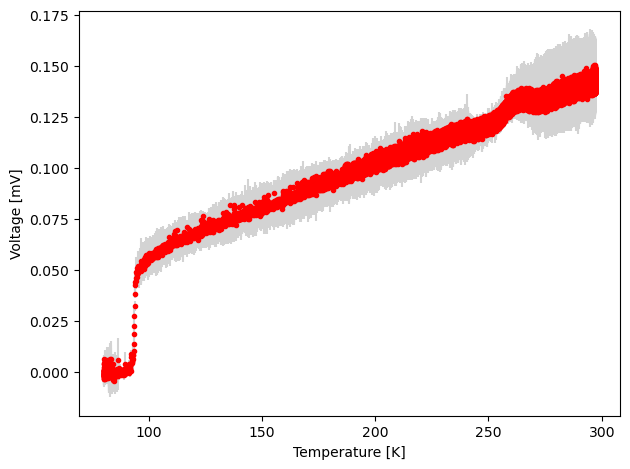

In [276]:
# plots of just the mean with uncertainty

# calculate the uncertainty based on V+ and V-
heating_voltages_mean_error_01 = abs(heating_voltages_mean_normalized_01 - heating_voltages_Vplus_normalized_01)
heating_voltages_mean_error_02 = abs(heating_voltages_mean_normalized_02 - heating_voltages_Vplus_normalized_02)
heating_voltages_mean_error_03 = abs(heating_voltages_mean_normalized_03 - heating_voltages_Vplus_normalized_03)
heating_voltages_mean_error_04 = abs(heating_voltages_mean_normalized_04 - heating_voltages_Vplus_normalized_04)
heating_voltages_mean_error_05 = abs(heating_voltages_mean_normalized_05 - heating_voltages_Vplus_normalized_05)
heating_voltages_mean_error_06 = abs(heating_voltages_mean_normalized_06 - heating_voltages_Vplus_normalized_06)

cooling_voltages_mean_error_01 = abs(cooling_voltages_mean_normalized_01 - cooling_voltages_Vplus_normalized_01)
cooling_voltages_mean_error_02 = abs(cooling_voltages_mean_normalized_02 - cooling_voltages_Vplus_normalized_02)
cooling_voltages_mean_error_03 = abs(cooling_voltages_mean_normalized_03 - cooling_voltages_Vplus_normalized_03)
cooling_voltages_mean_error_04 = abs(cooling_voltages_mean_normalized_04 - cooling_voltages_Vplus_normalized_04)
cooling_voltages_mean_error_05 = abs(cooling_voltages_mean_normalized_05 - cooling_voltages_Vplus_normalized_05)

# create the plots of mean heating and cooling curve for measurement set 01
plt.errorbar(heating_data_01[:,5], heating_voltages_mean_normalized_01, yerr = heating_voltages_mean_error_01, fmt = 'o', color = 'red', ecolor = 'lightgrey', markersize = 3 )

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.tight_layout()
plt.savefig('heating_curve_01_mean.png')

plt.show()

plt.errorbar(cooling_data_01[:,5], cooling_voltages_mean_normalized_01, yerr = cooling_voltages_mean_error_01, fmt = 'o', color = 'blue', ecolor = 'lightgrey', markersize = 3 )

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.tight_layout()
plt.savefig('cooling_curve_01_mean.png')

plt.show()

# create the plots of mean heating and cooling curve for measurement set 02
plt.errorbar(heating_data_02[:,5], heating_voltages_mean_normalized_02, yerr = heating_voltages_mean_error_02, fmt = 'o', color = 'red', ecolor = 'lightgrey', markersize = 3 )

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.tight_layout()
plt.savefig('heating_curve_02_mean.png')

plt.show()

plt.errorbar(cooling_data_02[:,5], cooling_voltages_mean_normalized_02, yerr = cooling_voltages_mean_error_02, fmt = 'o', color = 'blue', ecolor = 'lightgrey', markersize = 3 )

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.tight_layout()
plt.savefig('cooling_curve_02_mean.png')

plt.show()

# create the plots of mean heating and cooling curve for measurement set 03
plt.errorbar(heating_data_03[:,5], heating_voltages_mean_normalized_03, yerr = heating_voltages_mean_error_03, fmt = 'o', color = 'red', ecolor = 'lightgrey', markersize = 3 )

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.tight_layout()
plt.savefig('heating_curve_03_mean.png')

plt.show()

plt.errorbar(cooling_data_03[:,5], cooling_voltages_mean_normalized_03, yerr = cooling_voltages_mean_error_03, fmt = 'o', color = 'blue', ecolor = 'lightgrey', markersize = 3 )

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.tight_layout()
plt.savefig('cooling_curve_03_mean.png')

plt.show()

# create the plots of mean heating and cooling curve for measurement set 04
plt.errorbar(heating_data_04[:,5], heating_voltages_mean_normalized_04, yerr = heating_voltages_mean_error_04, fmt = 'o', color = 'red', ecolor = 'lightgrey', markersize = 3 )

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.tight_layout()
plt.savefig('heating_curve_04_mean.png')

plt.show()

plt.errorbar(cooling_data_04[:,5], cooling_voltages_mean_normalized_04, yerr = cooling_voltages_mean_error_04, fmt = 'o', color = 'blue', ecolor = 'lightgrey', markersize = 3 )

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.tight_layout()
plt.savefig('cooling_curve_04_mean.png')

plt.show()

# create the plots of mean heating and cooling curve for measurement set 05
plt.errorbar(heating_data_05[:,5], heating_voltages_mean_normalized_05, yerr = heating_voltages_mean_error_05, fmt = 'o', color = 'red', ecolor = 'lightgrey', markersize = 3 )

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.tight_layout()
plt.savefig('heating_curve_05_mean.png')

plt.show()

plt.errorbar(cooling_data_05[:,5], cooling_voltages_mean_normalized_05, yerr = cooling_voltages_mean_error_05, fmt = 'o', color = 'blue', ecolor = 'lightgrey', markersize = 3 )

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.tight_layout()
plt.savefig('cooling_curve_05_mean.png')

plt.show()

# create the plots of mean heating curve for measurement set 06
plt.errorbar(heating_data_06[:,5], heating_voltages_mean_normalized_06, yerr = heating_voltages_mean_error_06, fmt = 'o', color = 'red', ecolor = 'lightgrey', markersize = 3 )

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.tight_layout()
plt.savefig('heating_curve_06_mean.png')

plt.show()


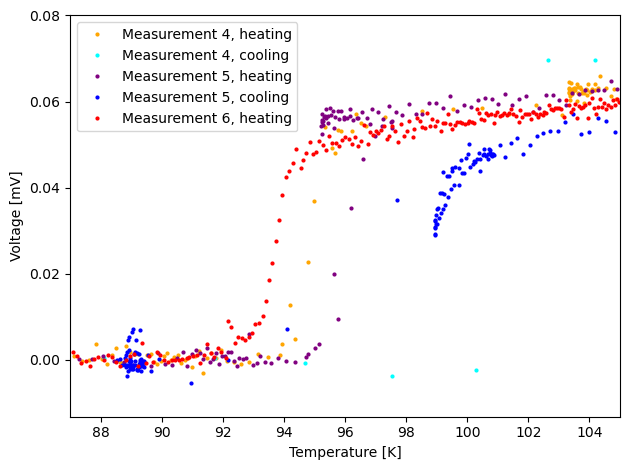

In [277]:
#plot of the best curves with and without B-field to look at the gradient change

plt.errorbar(heating_data_04[:,5] - 7, heating_voltages_mean_normalized_04, fmt = 'o', color = 'orange', ecolor = 'lightgrey', markersize = 2, label = "Measurement 4, heating")

plt.errorbar(cooling_data_04[:,5] - 25, cooling_voltages_mean_normalized_04, fmt = 'o', color = 'cyan', ecolor = 'lightgrey', markersize = 2, label = "Measurement 4, cooling")

plt.errorbar(heating_data_05[:,5] - 6, heating_voltages_mean_normalized_05, fmt = 'o', color = 'purple', ecolor = 'lightgrey', markersize = 2, label = "Measurement 5, heating" )

plt.errorbar(cooling_data_05[:,5] + 6, cooling_voltages_mean_normalized_05, fmt = 'o', color = 'blue', ecolor = 'lightgrey', markersize = 2, label = "Measurement 5, cooling" )

plt.errorbar(heating_data_06[:,5], heating_voltages_mean_normalized_06, fmt = 'o', color = 'red', ecolor = 'lightgrey', markersize = 2, label = "Measurement 6, heating" )

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [mV]')

plt.xlim(87, 105)
plt.ylim(None, 0.08)

plt.legend()

plt.tight_layout()
plt.savefig('B-field_comparison.png')

plt.show()


# Determine the critical temperature
- for all measurements once for heating with V+
- once for heating with V-
- once for cooling with V+
- once for cooling with V-

show the results in a table 

## Procedure
- bin the data into bins of size 1 degree
- reduce the data to the interesting temperature range from 80 to 110 degrees Kelvin 
    1. search for the maximum gradient between the binned data points 
    2. make a fit to the data and determine the critical temperature as the point with the highest gradient
- evaluation 
    1. show all results seperatly 
    2. average V+ and V- results
    3. average the heating and cooling results
    4. average all the data for a final result

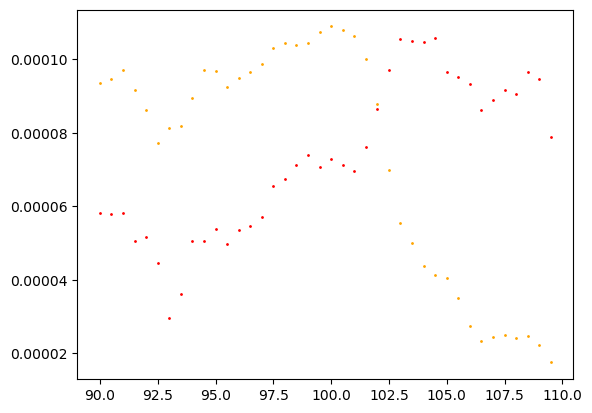

In [278]:
#bin the data of measurement 01
#bin the data into bins of size 1 degree
def bin_data(lowest_temperature, highest_temperature,data, bin_size, column) :
    binned_data = []
    for i in np.arange(lowest_temperature, highest_temperature, bin_size) :
        #get the data for that bin
        data_bin = data[(data[:,5] > i) & (data[:,5] < i + 1)]
        #get the mean of the data
        mean = np.mean(data_bin[:,column])
        binned_data.append(mean)
    return binned_data


def bin_data_with_uncertainty(lowest_temperature, highest_temperature,data, bin_size, column) :
    binned_data = []
    binned_std = []
    for i in np.arange(lowest_temperature, highest_temperature, bin_size) :
        #get the data for that bin
        data_bin = data[(data[:,5] > i) & (data[:,5] < i + 1)]
        #get the mean of the data
        mean = np.mean(data_bin[:,column])
        binned_data.append(mean)
        #calculate standard deviation for the bin
        std = np.std(data_bin[:,column])
        binned_std = np.append(binned_std, std)
        
    return binned_data, binned_std





bin_size = 0.5
vplus = 2
vminus = 4
lowest_temperature = 90
highest_temperature = 110


heating_data_01_binned_Vminus = bin_data(lowest_temperature,highest_temperature, heating_data_01, bin_size, vminus)
heating_data_01_binned_Vplus = bin_data(lowest_temperature, highest_temperature, heating_data_01, bin_size, vplus)
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), heating_data_01_binned_Vplus, s = 1, color = 
'red')
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), heating_data_01_binned_Vminus, s = 1, color = 
'orange')





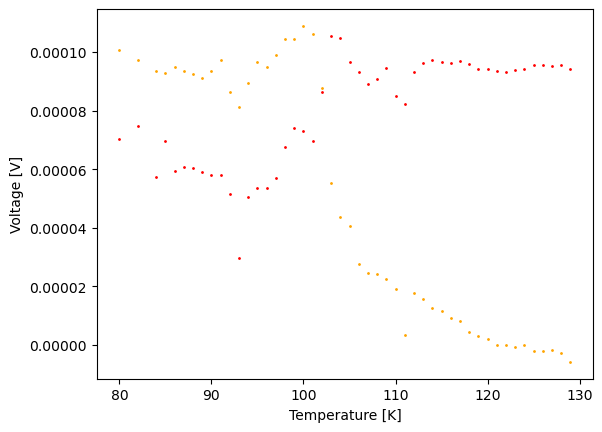

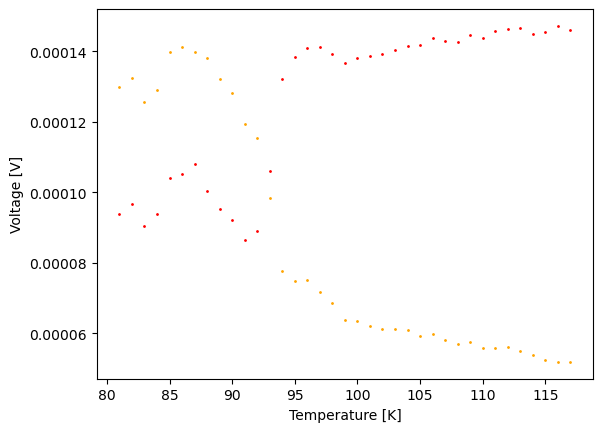

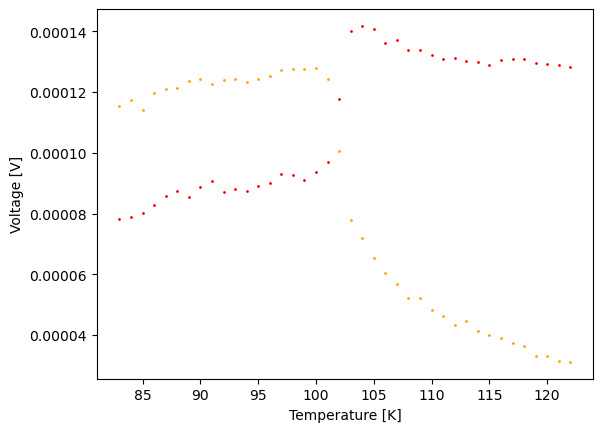

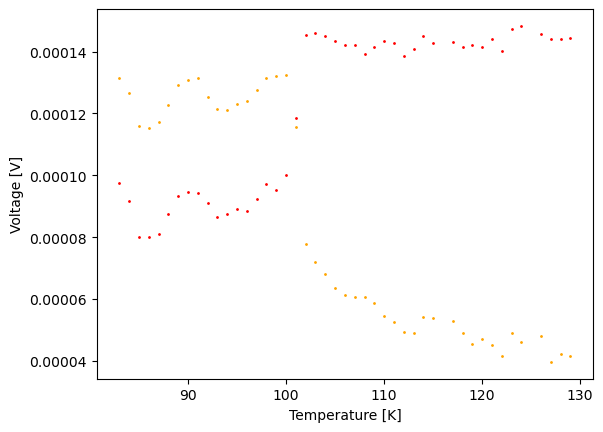

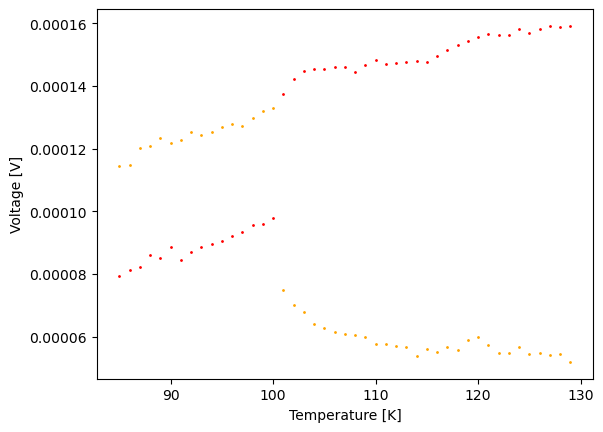

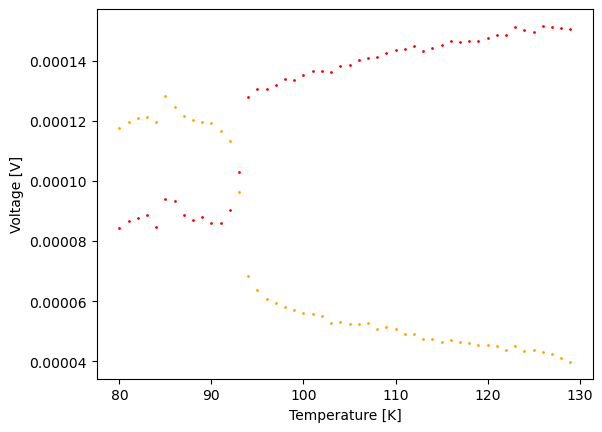

cooling data


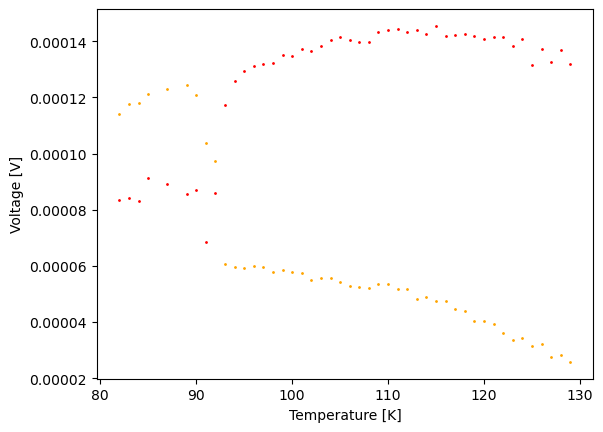

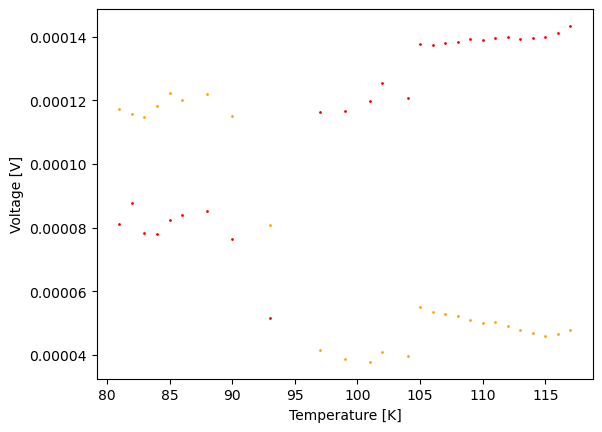

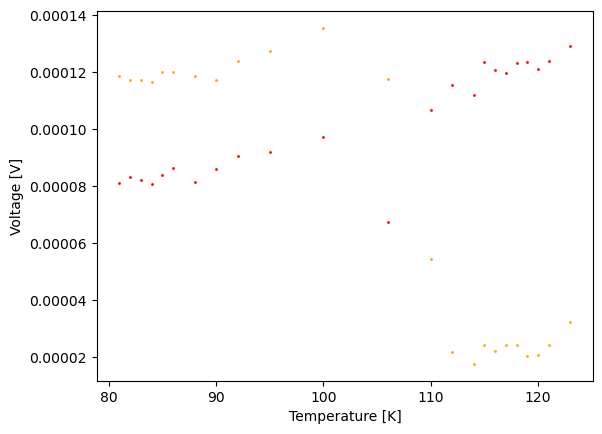

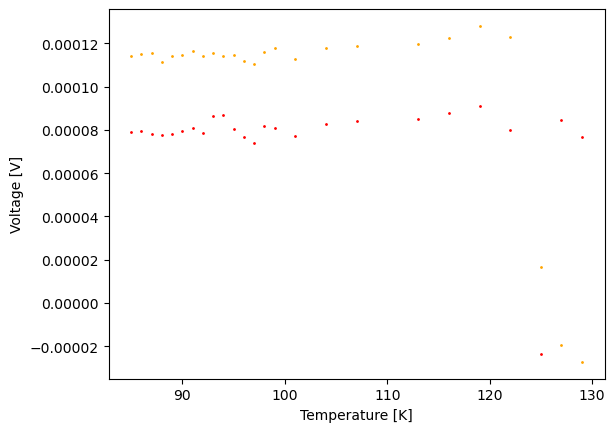

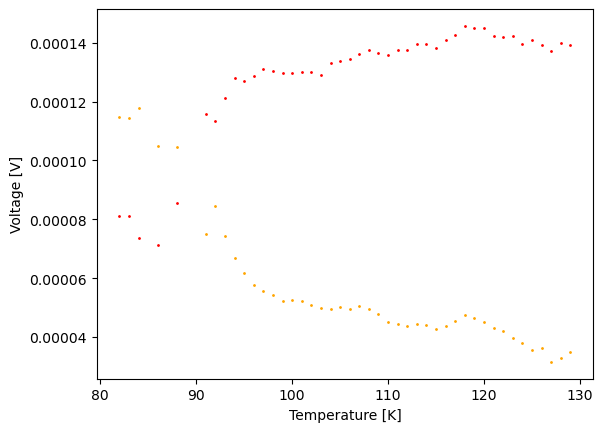

In [279]:
#for all ata bin the measurements
bin_size = 1
vplus = 2
vminus = 4
lowest_temperature = 80
highest_temperature = 130

all_heating_data = [heating_data_01, heating_data_02, heating_data_03, heating_data_04, heating_data_05, 
                    heating_data_06]

all_cooling_data = [cooling_data_01, cooling_data_02, cooling_data_03, cooling_data_04, cooling_data_05]


binned_heating_data_Vplus = []
binned_heating_data_Vminus = []
binned_cooling_data_Vplus = []
binned_cooling_data_Vminus = []

for data in all_heating_data :
    binned_Vplus = bin_data(lowest_temperature, highest_temperature, data, bin_size, vplus)
    binned_Vminus = bin_data(lowest_temperature, highest_temperature, data, bin_size, vminus)
    
    binned_heating_data_Vplus.append(binned_Vplus)
    binned_heating_data_Vminus.append(binned_Vminus)
    plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_Vplus, s = 1, color = 'red')
    plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_Vminus, s = 1, color = 'orange')
    plt.xlabel('Temperature [K]')
    plt.ylabel('Voltage [V]')
    plt.show()
    
print("cooling data")
for data in all_cooling_data :
    binned_Vplus = bin_data(lowest_temperature, highest_temperature, data, bin_size, vplus)
    binned_Vminus = bin_data(lowest_temperature, highest_temperature, data, bin_size, vminus)
    
    binned_cooling_data_Vplus.append(binned_Vplus)
    binned_cooling_data_Vminus.append(binned_Vminus)
    
    plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_Vplus, s = 1, color = 'red')
    plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_Vminus, s = 1, color = 'orange')
    plt.xlabel('Temperature [K]')
    plt.ylabel('Voltage [V]')
    plt.show()
    

# Calculate the gradient of the binned data 

In [280]:
#calculate the gradient of the binned data
#using left and point to calculate the gradien
def calculate_gradient(binned_data, size) :
    gradient = np.gradient(binned_data, size)
    gradient = np.array(gradient)
    gradient = np.abs(gradient)
    return gradient

#aaray for all te argmax values in temperature of the gradient in two dimensions
row =0
size = 1
argmax_values = np.zeros((6,4))
max_gradients = np.zeros((6,4))



for data in binned_heating_data_Vplus :
    gradient = calculate_gradient(data, size)
    #show at which index the gradient is the highest
    #put the argmax value into the array 0 column
    critical_temperature = np.arange(lowest_temperature, highest_temperature, bin_size)[np.nanargmax(gradient)]
    argmax_values[row,0]= critical_temperature
    max_gradients[row,0] = gradient[np.nanargmax(gradient)]
    row += 1
   
    
row = 0
for data in binned_heating_data_Vminus :
    gradient = calculate_gradient(data, size)
    #show at which index the gradient is the highest
    #put the argmax value into the array 1 column
    critical_temperature = np.arange(lowest_temperature, highest_temperature, bin_size)[np.nanargmax(gradient)]
    argmax_values[row,1]= critical_temperature 
    max_gradients[row,1] = gradient[np.nanargmax(gradient)]
    row += 1
    

row = 0
for data in binned_cooling_data_Vplus :
    gradient = calculate_gradient(data, size)
    #show at which index the gradient is the highest
    #put the argmax value into the array 2 column
    critical_temperature = np.arange(lowest_temperature, highest_temperature, bin_size)[np.nanargmax(gradient)]
    argmax_values[row,2]= critical_temperature 
    max_gradients[row,2] = gradient[np.nanargmax(gradient)]
    row += 1
    

row = 0
for data in binned_cooling_data_Vminus :
    gradient = calculate_gradient(data, size)
    #show at which index the gradient is the highest
    #put the argmax value into the array 3 column
    critical_temperature = np.arange(lowest_temperature, highest_temperature, bin_size)[np.nanargmax(gradient)]
    argmax_values[row,3]= critical_temperature 
    max_gradients[row,3] = gradient[np.nanargmax(gradient)]
    row += 1
    

print(argmax_values)
print(max_gradients)

#save the results in a table
np.savetxt('critical_temperatures.csv', argmax_values, delimiter = ',')
np.savetxt('max_gradients.csv', max_gradients, delimiter = ',')


    
    

[[102. 102.  92.  92.]
 [ 93.  93. 105. 105.]
 [102. 102. 115. 111.]
 [101. 101. 126. 126.]
 [101. 101.  93.  93.]
 [ 93.  93.   0.   0.]]
[[1.78517500e-05 2.54273250e-05 2.44377500e-05 2.14455500e-05]
 [2.15959500e-05 1.87861700e-05 8.32728947e-06 7.00700789e-06]
 [2.14578500e-05 2.31027250e-05 4.44650000e-06 1.63912500e-05]
 [2.25568125e-05 2.74241100e-05 5.41925000e-05 1.80006500e-05]
 [2.22723827e-05 3.12832654e-05 7.34522917e-06 8.80211042e-06]
 [1.87780611e-05 2.24802000e-05 0.00000000e+00 0.00000000e+00]]


# Anakyse the gradients
- subtract the average gradient of measurement 4 and 5 from the ones in 1, 2,3
- Problem, binning is not fine enough maybe just make a quality analyse of best measurements. because spatial 
resolution is not good enough 

In [281]:
#subtract the average gradient of measurement 4 and 5 from the ones in 1, 2,3
average_gradient_4_5 = np.mean(max_gradients[3:5, :])
print(max_gradients[3:5, :])
print(max_gradients[0:3, :])
average_gradient_1_3 = np.mean(max_gradients[0:3, :])

difference = average_gradient_1_3 - average_gradient_4_5


print(average_gradient_4_5)
print(average_gradient_1_3)
print(difference)

[[2.25568125e-05 2.74241100e-05 5.41925000e-05 1.80006500e-05]
 [2.22723827e-05 3.12832654e-05 7.34522917e-06 8.80211042e-06]]
[[1.78517500e-05 2.54273250e-05 2.44377500e-05 2.14455500e-05]
 [2.15959500e-05 1.87861700e-05 8.32728947e-06 7.00700789e-06]
 [2.14578500e-05 2.31027250e-05 4.44650000e-06 1.63912500e-05]]
2.398463252003205e-05
1.7523093114035083e-05
-6.461539405996968e-06


## Average max gradients are not suitable for analysis
- use the best data to show it in an example 
- 

Plot of voltage gradient for measurement set 01 when heating


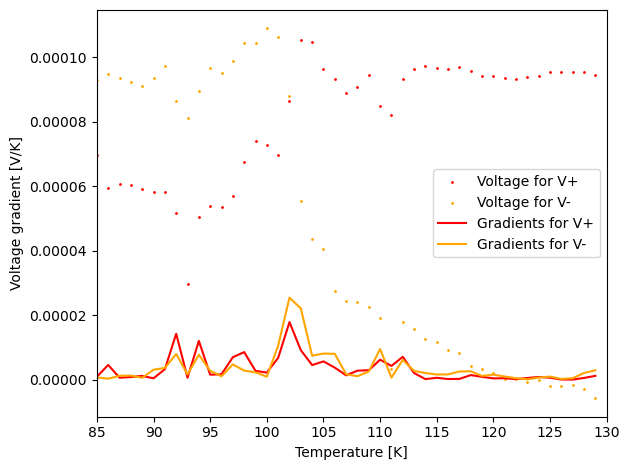

the maximal gradient for V+ is: 1.7851749999999994e-05 at 102.0 K
the maximal gradient for V- is: 2.5427325e-05 at 102.0 K

Plot of voltage gradient for measurement set 02 when heating


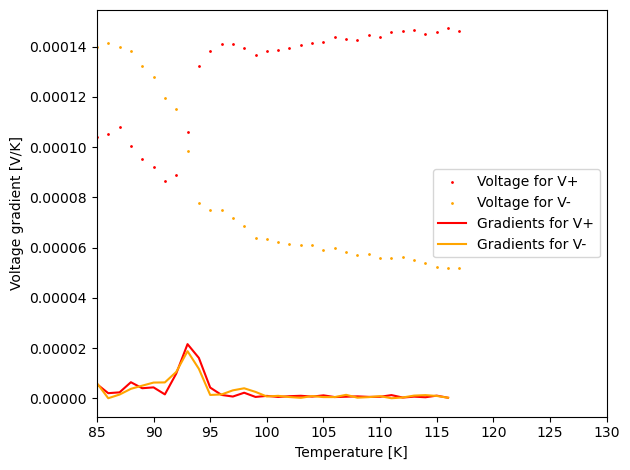

the maximal gradient for V+ is: 2.1595949999999998e-05 at 93.0 K
the maximal gradient for V- is: 1.8786169999999998e-05 at 93.0 K

Plot of voltage gradient for measurement set 03 when heating


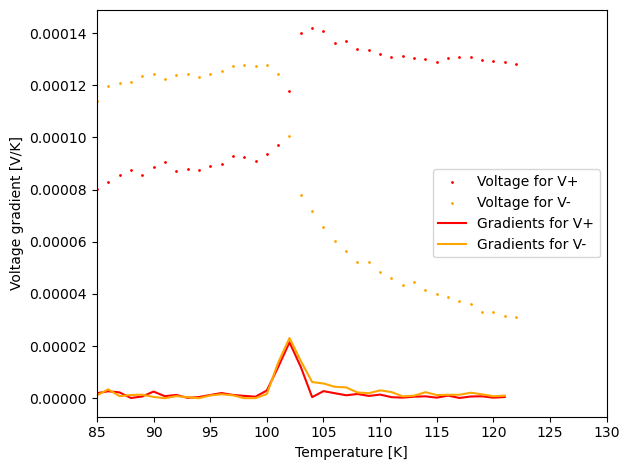

the maximal gradient for V+ is: 2.145785e-05 at 102.0 K
the maximal gradient for V- is: 2.3102725e-05 at 102.0 K

Plot of voltage gradient for measurement set 04 when heating


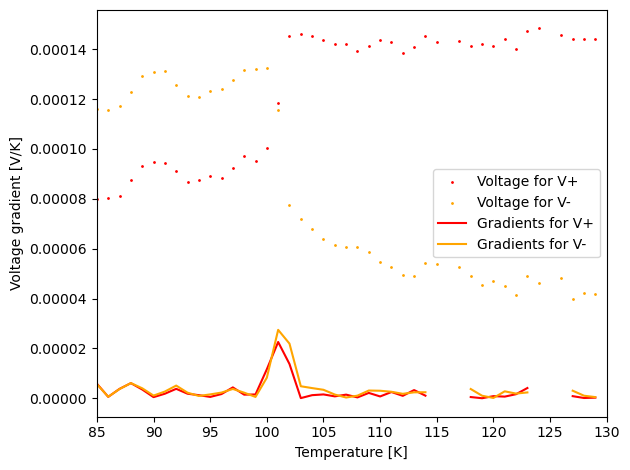

the maximal gradient for V+ is: 2.255681250000001e-05 at 101.0 K
the maximal gradient for V- is: 2.7424110000000008e-05 at 101.0 K

Plot of voltage gradient for measurement set 05 when heating


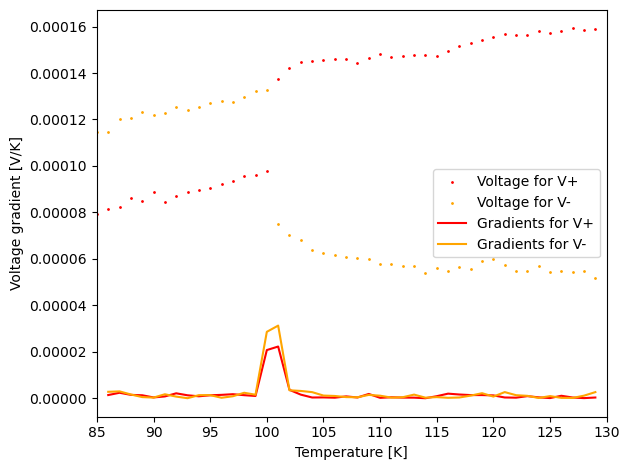

the maximal gradient for V+ is: 2.22723826923077e-05 at 101.0 K
the maximal gradient for V- is: 3.128326538461538e-05 at 101.0 K

Plot of voltage gradient for measurement set 06 when heating


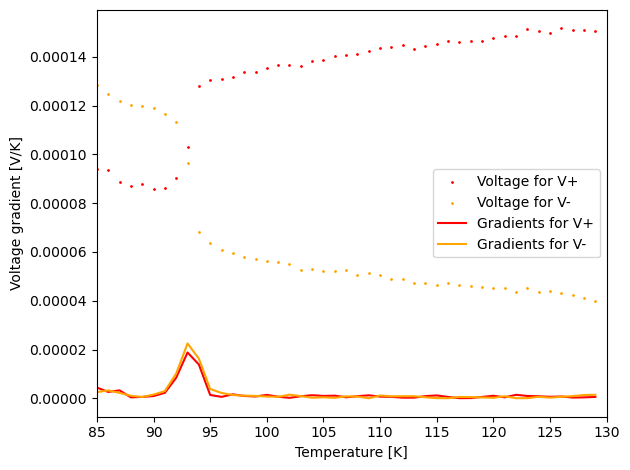

the maximal gradient for V+ is: 1.877806111111112e-05 at 93.0 K
the maximal gradient for V- is: 2.2480199999999995e-05 at 93.0 K

Plot of voltage gradient for measurement set 01 when cooling


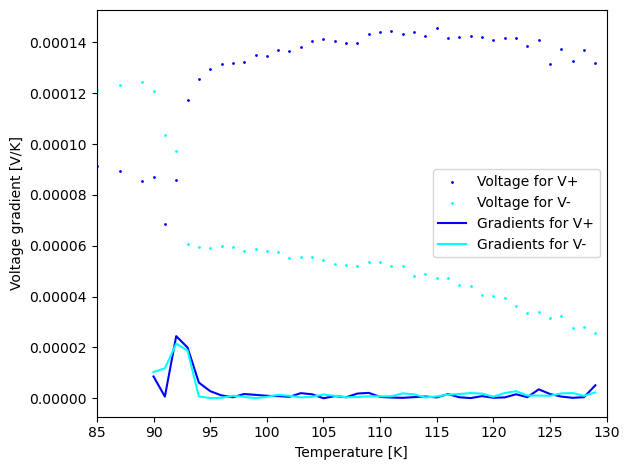

the maximal gradient for V+ is: 2.443775e-05 at 92.0 K
the maximal gradient for V- is: 2.144555e-05 at 92.0 K

Plot of voltage gradient for measurement set 02 when cooling


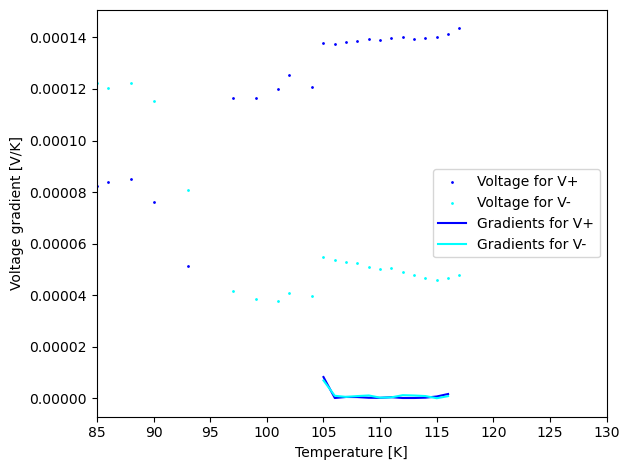

the maximal gradient for V+ is: 8.32728947368421e-06 at 105.0 K
the maximal gradient for V- is: 7.007007894736838e-06 at 105.0 K

Plot of voltage gradient for measurement set 03 when cooling


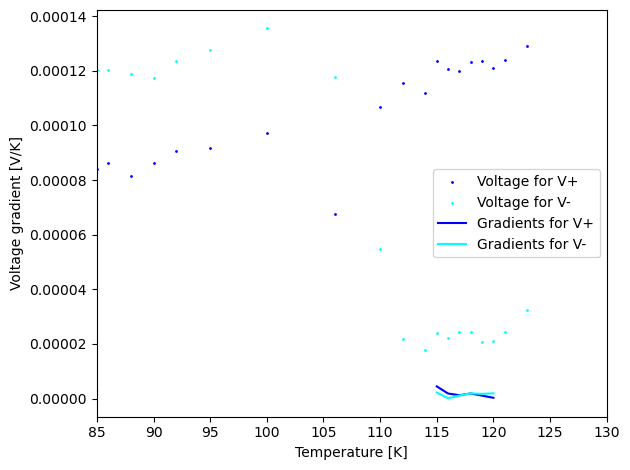

the maximal gradient for V+ is: 4.446499999999999e-06 at 115.0 K
the maximal gradient for V- is: 1.6391250000000003e-05 at 111.0 K

Plot of voltage gradient for measurement set 04 when cooling


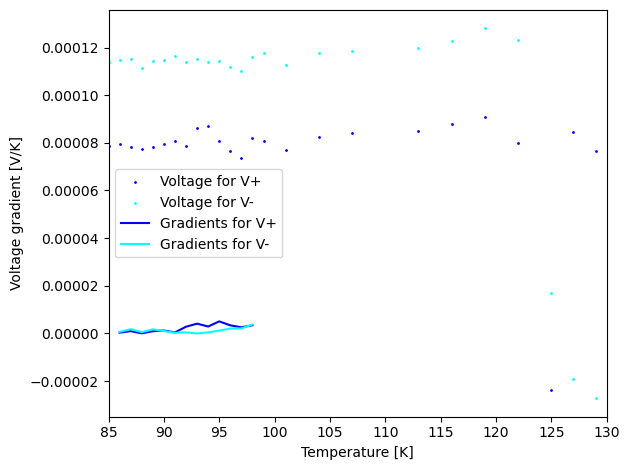

the maximal gradient for V+ is: 5.41925e-05 at 126.0 K
the maximal gradient for V- is: 1.8000650000000002e-05 at 126.0 K

Plot of voltage gradient for measurement set 05 when cooling


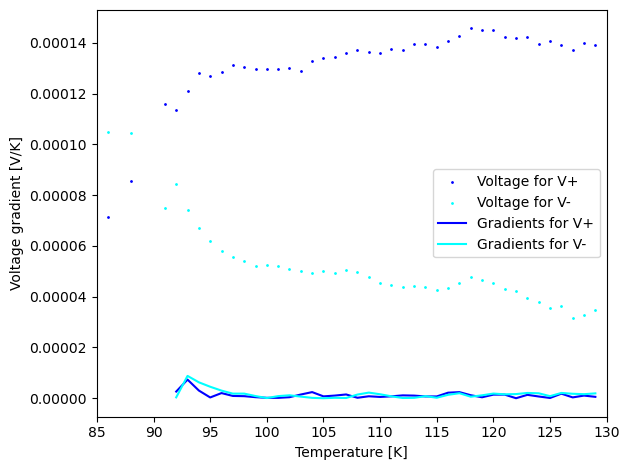

the maximal gradient for V+ is: 7.3452291666666595e-06 at 93.0 K
the maximal gradient for V- is: 8.802110416666663e-06 at 93.0 K



In [282]:
#define temperature range on plot
plot_max_temp = 130
plot_min_temp = 85

print("Plot of voltage gradient for measurement set 01 when heating")

# plot gradient of measurement 01 in the range of 85 to 110 while heating
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_heating_data_Vplus[0], s = 1, color = 'red', label = "Voltage for V+")
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_heating_data_Vminus[0], s = 1, color = 'orange', label = "Voltage for V-")

#compute the gradients
gradient_Vplus = calculate_gradient(binned_heating_data_Vplus[0], size)
gradient_Vminus = calculate_gradient(binned_heating_data_Vminus[0], size)
# plot the gradients
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vplus, color = 'red', label = "Gradients for V+")
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vminus, color = 'orange', label = "Gradients for V-")
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage gradient [V/K]')
plt.xlim(plot_min_temp,plot_max_temp)
plt.legend()

plt.tight_layout()
plt.savefig('heating_voltage gradient_01.png')

plt.show()

print("the maximal gradient for V+ is:", np.nanmax(gradient_Vplus), "at", argmax_values[0][0], "K")
print("the maximal gradient for V- is:", np.nanmax(gradient_Vminus), "at", argmax_values[0][1], "K")
print()

#-------------
print("Plot of voltage gradient for measurement set 02 when heating")

#same for 02 heating
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_heating_data_Vplus[1], s = 1, color = 'red', label = "Voltage for V+")
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_heating_data_Vminus[1], s = 1, color = 'orange', label = "Voltage for V-")

#compute the gradients
gradient_Vplus = calculate_gradient(binned_heating_data_Vplus[1], size)
gradient_Vminus = calculate_gradient(binned_heating_data_Vminus[1], size)
# plot the gradients
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vplus, color = 'red', label = "Gradients for V+")
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vminus, color = 'orange', label = "Gradients for V-")
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage gradient [V/K]')
plt.xlim(plot_min_temp,plot_max_temp)
plt.legend()

plt.tight_layout()
plt.savefig('heating_voltage gradient_02.png')

plt.show()


print("the maximal gradient for V+ is:", np.nanmax(gradient_Vplus), "at", argmax_values[1][0], "K")
print("the maximal gradient for V- is:", np.nanmax(gradient_Vminus), "at", argmax_values[1][1], "K")
print()

#-------------
print("Plot of voltage gradient for measurement set 03 when heating")

#same for 03 heating
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_heating_data_Vplus[2], s = 1, color = 'red', label = "Voltage for V+")
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_heating_data_Vminus[2], s = 1, color = 'orange', label = "Voltage for V-")

#compute the gradients
gradient_Vplus = calculate_gradient(binned_heating_data_Vplus[2], size)
gradient_Vminus = calculate_gradient(binned_heating_data_Vminus[2], size)
# plot the gradients
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vplus, color = 'red', label = "Gradients for V+")
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vminus, color = 'orange', label = "Gradients for V-")
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage gradient [V/K]')
plt.xlim(plot_min_temp,plot_max_temp)
plt.legend()

plt.tight_layout()
plt.savefig('heating_voltage gradient_03.png')

plt.show()


print("the maximal gradient for V+ is:", np.nanmax(gradient_Vplus), "at", argmax_values[2][0], "K")
print("the maximal gradient for V- is:", np.nanmax(gradient_Vminus), "at", argmax_values[2][1], "K")
print()

#-------------
print("Plot of voltage gradient for measurement set 04 when heating")

#same for 04 heating
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_heating_data_Vplus[3], s = 1, color = 'red', label = "Voltage for V+")
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_heating_data_Vminus[3], s = 1, color = 'orange', label = "Voltage for V-")

#compute the gradients
gradient_Vplus = calculate_gradient(binned_heating_data_Vplus[3], size)
gradient_Vminus = calculate_gradient(binned_heating_data_Vminus[3], size)
# plot the gradients
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vplus, color = 'red', label = "Gradients for V+")
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vminus, color = 'orange', label = "Gradients for V-")
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage gradient [V/K]')
plt.xlim(plot_min_temp,plot_max_temp)
plt.legend()

plt.tight_layout()
plt.savefig('heating_voltage gradient_04.png')

plt.show()


print("the maximal gradient for V+ is:", np.nanmax(gradient_Vplus), "at", argmax_values[3][0], "K")
print("the maximal gradient for V- is:", np.nanmax(gradient_Vminus), "at", argmax_values[3][1], "K")
print()

#-------------
print("Plot of voltage gradient for measurement set 05 when heating")

#same for 05 heating
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_heating_data_Vplus[4], s = 1, color = 'red', label = "Voltage for V+")
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_heating_data_Vminus[4], s = 1, color = 'orange', label = "Voltage for V-")

#compute the gradients
gradient_Vplus = calculate_gradient(binned_heating_data_Vplus[4], size)
gradient_Vminus = calculate_gradient(binned_heating_data_Vminus[4], size)
# plot the gradients
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vplus, color = 'red', label = "Gradients for V+")
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vminus, color = 'orange', label = "Gradients for V-")
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage gradient [V/K]')
plt.xlim(plot_min_temp,plot_max_temp)
plt.legend()

plt.tight_layout()
plt.savefig('heating_voltage gradient_05.png')

plt.show()


print("the maximal gradient for V+ is:", np.nanmax(gradient_Vplus), "at", argmax_values[4][0], "K")
print("the maximal gradient for V- is:", np.nanmax(gradient_Vminus), "at", argmax_values[4][1], "K")
print()

#-------------

print("Plot of voltage gradient for measurement set 06 when heating")

#plot gradient of measurement 06 in the range of 80 to 110
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_heating_data_Vplus[5], s = 1, color = 'red', label = "Voltage for V+")
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_heating_data_Vminus[5], s = 1, color = 'orange', label = "Voltage for V-")

#compute the gradients
gradient_Vplus = calculate_gradient(binned_heating_data_Vplus[5], size)
gradient_Vminus = calculate_gradient(binned_heating_data_Vminus[5], size)
# plot the gradients
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vplus, color = 'red', label = "Gradients for V+")
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vminus, color = 'orange', label = "Gradients for V-")
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage gradient [V/K]')
plt.xlim(plot_min_temp,plot_max_temp)
plt.legend()

plt.tight_layout()
plt.savefig('heating_voltage gradient_06.png')

plt.show()

print("the maximal gradient for V+ is:", np.nanmax(gradient_Vplus), "at", argmax_values[5][0], "K")
print("the maximal gradient for V- is:", np.nanmax(gradient_Vminus), "at", argmax_values[5][1], "K")
print()

#----------

print("Plot of voltage gradient for measurement set 01 when cooling")

# plot gradient of measurement 01 in the range of 85 to 110 while cooling
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_cooling_data_Vplus[0], s = 1, color = 'blue', label = "Voltage for V+")
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_cooling_data_Vminus[0], s = 1, color = 'cyan', label = "Voltage for V-")

#compute the gradients
gradient_Vplus = calculate_gradient(binned_cooling_data_Vplus[0], size)
gradient_Vminus = calculate_gradient(binned_cooling_data_Vminus[0], size)
# plot the gradients
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vplus, color = 'blue', label = "Gradients for V+")
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vminus, color = 'cyan', label = "Gradients for V-")
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage gradient [V/K]')
plt.xlim(plot_min_temp,plot_max_temp)
plt.legend()

plt.tight_layout()
plt.savefig('cooling_voltage gradient_01.png')

plt.show()

print("the maximal gradient for V+ is:", np.nanmax(gradient_Vplus), "at", argmax_values[0][2], "K")
print("the maximal gradient for V- is:", np.nanmax(gradient_Vminus), "at", argmax_values[0][3], "K")
print()

#-------------

print("Plot of voltage gradient for measurement set 02 when cooling")

# plot gradient of measurement 01 in the range of 85 to 110 while cooling
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_cooling_data_Vplus[1], s = 1, color = 'blue', label = "Voltage for V+")
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_cooling_data_Vminus[1], s = 1, color = 'cyan', label = "Voltage for V-")

#compute the gradients
gradient_Vplus = calculate_gradient(binned_cooling_data_Vplus[1], size)
gradient_Vminus = calculate_gradient(binned_cooling_data_Vminus[1], size)
# plot the gradients
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vplus, color = 'blue', label = "Gradients for V+")
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vminus, color = 'cyan', label = "Gradients for V-")
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage gradient [V/K]')
plt.xlim(plot_min_temp,plot_max_temp)
plt.legend()

plt.tight_layout()
plt.savefig('cooling_voltage gradient_02.png')

plt.show()

print("the maximal gradient for V+ is:", np.nanmax(gradient_Vplus), "at", argmax_values[1][2], "K")
print("the maximal gradient for V- is:", np.nanmax(gradient_Vminus), "at", argmax_values[1][3], "K")
print()

#-------------

print("Plot of voltage gradient for measurement set 03 when cooling")

# plot gradient of measurement 01 in the range of 85 to 110 while cooling
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_cooling_data_Vplus[2], s = 1, color = 'blue', label = "Voltage for V+")
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_cooling_data_Vminus[2], s = 1, color = 'cyan', label = "Voltage for V-")

#compute the gradients
gradient_Vplus = calculate_gradient(binned_cooling_data_Vplus[2], size)
gradient_Vminus = calculate_gradient(binned_cooling_data_Vminus[2], size)
# plot the gradients
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vplus, color = 'blue', label = "Gradients for V+")
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vminus, color = 'cyan', label = "Gradients for V-")
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage gradient [V/K]')
plt.xlim(plot_min_temp,plot_max_temp)
plt.legend()

plt.tight_layout()
plt.savefig('cooling_voltage gradient_03.png')

plt.show()

print("the maximal gradient for V+ is:", np.nanmax(gradient_Vplus), "at", argmax_values[2][2], "K")
print("the maximal gradient for V- is:", np.nanmax(gradient_Vminus), "at", argmax_values[2][3], "K")
print()

#-------------

print("Plot of voltage gradient for measurement set 04 when cooling")

# plot gradient of measurement 01 in the range of 85 to 110 while cooling
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_cooling_data_Vplus[3], s = 1, color = 'blue', label = "Voltage for V+")
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_cooling_data_Vminus[3], s = 1, color = 'cyan', label = "Voltage for V-")

#compute the gradients
gradient_Vplus = calculate_gradient(binned_cooling_data_Vplus[3], size)
gradient_Vminus = calculate_gradient(binned_cooling_data_Vminus[3], size)
# plot the gradients
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vplus, color = 'blue', label = "Gradients for V+")
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vminus, color = 'cyan', label = "Gradients for V-")
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage gradient [V/K]')
plt.xlim(plot_min_temp,plot_max_temp)
plt.legend()

plt.tight_layout()
plt.savefig('cooling_voltage gradient_04.png')

plt.show()

print("the maximal gradient for V+ is:", np.nanmax(gradient_Vplus), "at", argmax_values[3][2], "K")
print("the maximal gradient for V- is:", np.nanmax(gradient_Vminus), "at", argmax_values[3][3], "K")
print()

#-------------

print("Plot of voltage gradient for measurement set 05 when cooling")

# plot gradient of measurement 01 in the range of 85 to 110 while cooling
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_cooling_data_Vplus[4], s = 1, color = 'blue', label = "Voltage for V+")
plt.scatter(np.arange(lowest_temperature, highest_temperature, bin_size), binned_cooling_data_Vminus[4], s = 1, color = 'cyan', label = "Voltage for V-")

#compute the gradients
gradient_Vplus = calculate_gradient(binned_cooling_data_Vplus[4], size)
gradient_Vminus = calculate_gradient(binned_cooling_data_Vminus[4], size)
# plot the gradients
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vplus, color = 'blue', label = "Gradients for V+")
plt.plot(np.arange(lowest_temperature, highest_temperature, bin_size), gradient_Vminus, color = 'cyan', label = "Gradients for V-")
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage gradient [V/K]')
plt.xlim(plot_min_temp,plot_max_temp)
plt.legend()

plt.tight_layout()
plt.savefig('cooling_voltage gradient_05.png')

plt.show()

print("the maximal gradient for V+ is:", np.nanmax(gradient_Vplus), "at", argmax_values[4][2], "K")
print("the maximal gradient for V- is:", np.nanmax(gradient_Vminus), "at", argmax_values[4][3], "K")
print()

#-------------



## For the slope the width of the gradient curve could be a good indicator


# Behaviour of the resistivity aboce the critical temperature

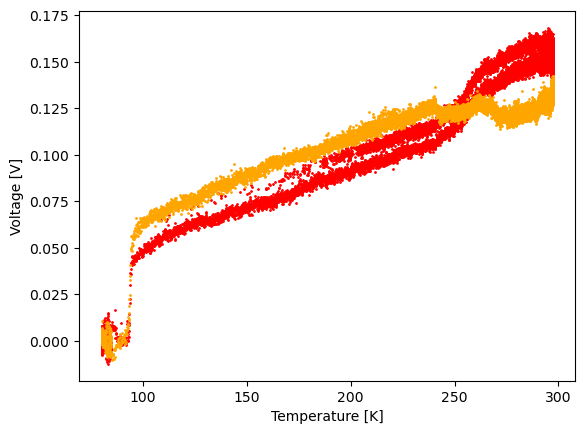

In [283]:
# only use measurenment 06 for the analysis

#override the heating data with the normalized data for measurment 06
heating_data_06[:,2] = heating_voltages_Vplus_normalized_06
heating_data_06[:,4] = heating_voltages_Vminus_normalized_06

#plot original V+ and V- data of measurement 06
plt.scatter(heating_data_06[:,5], heating_voltages_Vplus_normalized_06, s = 1, color = 'red', label = f"V+ with the offset {heating_Vplus_offset_06:.2f} mV")
plt.scatter(heating_data_06[:,5], heating_voltages_Vminus_normalized_06, s = 1, color = 'orange', label = f"V+ with the offset {heating_Vminus_offset_06:.2f} mV")

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()



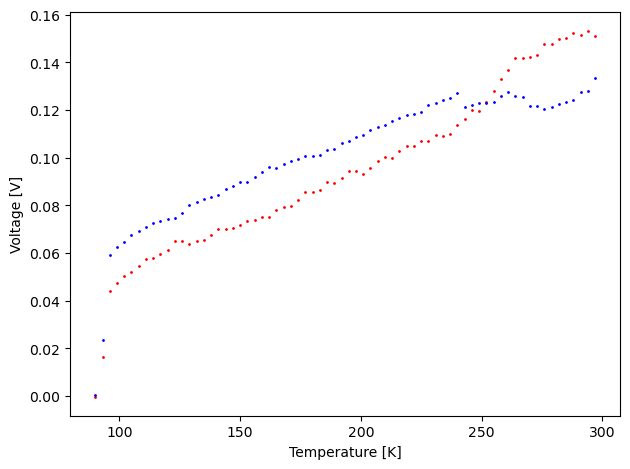

In [284]:
#bin the data of measurement 06
#bin the data into bins of size 1 degree
temp_delta =3

heating_data_06_binned_Vplus, vplus_uncertainty = bin_data_with_uncertainty(90, 350, heating_data_06, temp_delta, 2)
heating_data_06_binned_Vminus, vminus_uncertainty = bin_data_with_uncertainty(90, 350, heating_data_06, temp_delta, 4)


plt.scatter(np.arange(90, 350, temp_delta), heating_data_06_binned_Vplus, s = 1, color = 'red')
plt.scatter(np.arange(90, 350, temp_delta), heating_data_06_binned_Vminus, s = 1, color = 'blue')


plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_curve_06_binned_for_metal.png')
plt.show()






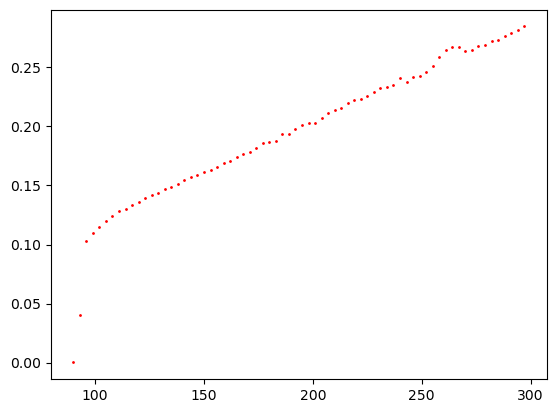

In [285]:
#average the two binned plots


averaged_06 = np.array(heating_data_06_binned_Vplus) + np.array(heating_data_06_binned_Vminus)

plt.scatter(np.arange(90, 350, temp_delta), averaged_06, s = 1, color = 'red')


<ErrorbarContainer object of 3 artists>

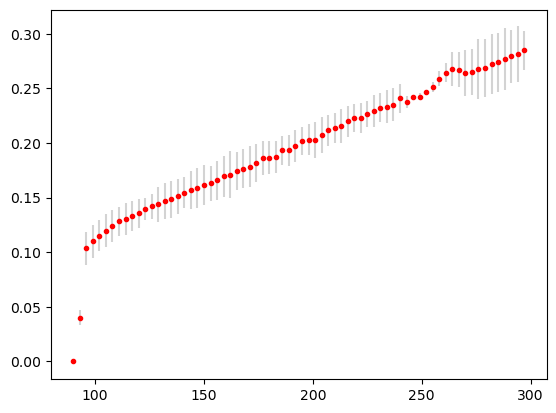

In [286]:
#with error bars
error = np.abs(np.array(heating_data_06_binned_Vplus) - np.array(heating_data_06_binned_Vminus))

plt.errorbar(np.arange(90, 350, temp_delta), averaged_06, yerr = error, fmt = 'o', color
= 'red', ecolor = 'lightgrey', markersize = 3 )


5.784628710112252e-06


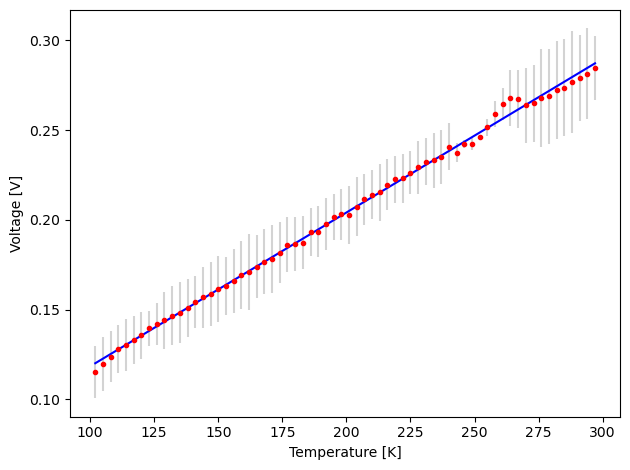

In [287]:
#fit a linear and a quadratic function to the data 
heating_data_averaged_06 = np.column_stack((np.arange(90, 350, temp_delta), averaged_06, 
                                           error))

heating_data_averaged_06 = heating_data_averaged_06[(heating_data_averaged_06[:,0] > 100) & (heating_data_averaged_06[:,0] < 300)]

plt.errorbar(heating_data_averaged_06[:,0],heating_data_averaged_06[:,1],yerr = heating_data_averaged_06[:,2] ,fmt = 
'o', color = 'red', ecolor = 'lightgrey', markersize = 3)

p1 = np.polyfit(heating_data_averaged_06[:,0],heating_data_averaged_06[:,1],1)
p2 = np.polyfit(heating_data_averaged_06[:,0],heating_data_averaged_06[:,1],2)

plt.plot(heating_data_averaged_06[:,0], np.polyval(p1, heating_data_averaged_06[:,0]), color = 'blue')
#plt.plot(heating_data_averaged_06[:,0], np.polyval(p2, heating_data_averaged_06[:,0]), color = 'orange', linestyle = 'dashed')

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('averaged_fits_p1')

mse1 = np.mean((np.polyval(p1, heating_data_averaged_06[:,0]) - heating_data_averaged_06[:,1])**2)

print(mse1)

[0.00085705 0.03270059]
[-2.45480656e-07  9.54994505e-04  2.37321961e-02]
5.784628710112252e-06
5.270674876707985e-06


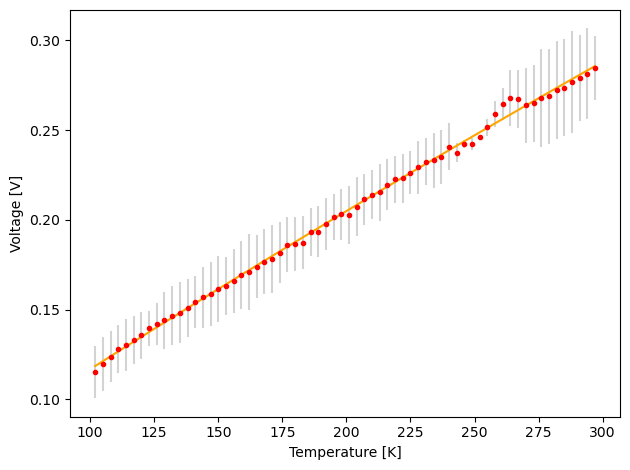

In [288]:
#fit a linear and a quadratic function to the data 
heating_data_averaged_06 = np.column_stack((np.arange(90, 350, temp_delta), averaged_06, 
                                           error))

heating_data_averaged_06 = heating_data_averaged_06[(heating_data_averaged_06[:,0] > 100) & (heating_data_averaged_06[:,0] < 300)]

plt.errorbar(heating_data_averaged_06[:,0],heating_data_averaged_06[:,1],yerr = heating_data_averaged_06[:,2] ,fmt = 
'o', color = 'red', ecolor = 'lightgrey', markersize = 3)

p1 = np.polyfit(heating_data_averaged_06[:,0],heating_data_averaged_06[:,1],1)
p2 = np.polyfit(heating_data_averaged_06[:,0],heating_data_averaged_06[:,1],2)

#plt.plot(heating_data_averaged_06[:,0], np.polyval(p1, heating_data_averaged_06[:,0]), color = 'blue')
plt.plot(heating_data_averaged_06[:,0], np.polyval(p2, heating_data_averaged_06[:,0]), color = 'orange')

plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('averaged_fits_p2')

print(p1)
print(p2)

mse2 = np.mean((np.polyval(p2, heating_data_averaged_06[:,0]) - heating_data_averaged_06[:,1])**2)
print(mse1)
print(mse2)


2.2313820286636045e-05
7.70304504772637e-06
linear fit vplus
[ 0.0005313  -0.00737694]
quadratic fit vplus
[1.30885595e-06 9.06275051e-06 4.04408038e-02]


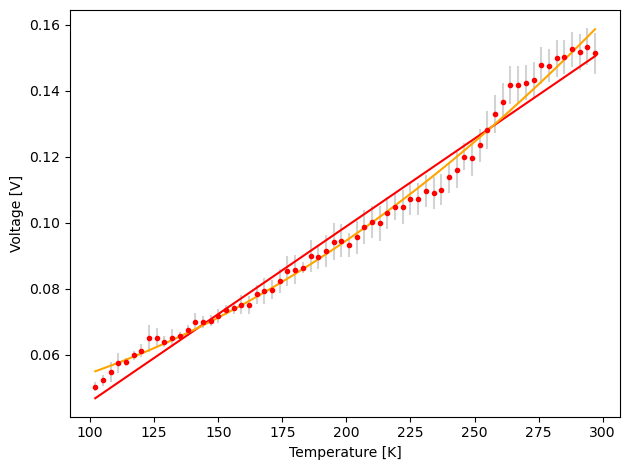

In [289]:
    #restrict the data to the interesting temperature range 100 to 300
#concatenate the binned data and the temperature to one 2d array
heating_data_06_binned = np.column_stack((np.arange(90, 350, temp_delta), heating_data_06_binned_Vplus,heating_data_06_binned_Vminus, vplus_uncertainty, vminus_uncertainty))
heating_data_06_binned = heating_data_06_binned[(heating_data_06_binned[:,0] > 100) & (heating_data_06_binned[:,0] < 300)]
#get index of value 


#reduce the error array to the same size


#plot with errors
error_Vplus = heating_data_06_binned[:,3]
error_Vminus = heating_data_06_binned[:,4]

plt.errorbar(heating_data_06_binned[:,0], heating_data_06_binned[:,1], yerr = error_Vplus, fmt = 'o', color = 'red', ecolor = 'lightgrey', markersize = 3 )



#plot
plt.scatter(heating_data_06_binned[:,0], heating_data_06_binned[:,1], s = 1, color = 'red')


#polyfit the data with a degree 1 and a degree 2 polynomial
p1 = np.polyfit(heating_data_06_binned[:,0], heating_data_06_binned[:,1], 1)
p2 = np.polyfit(heating_data_06_binned[:,0], heating_data_06_binned[:,1], 2)

#calculate the mse of the fits
mse1 = np.mean((np.polyval(p1, heating_data_06_binned[:,0]) - heating_data_06_binned[:,1])**2)
mse2 = np.mean((np.polyval(p2, heating_data_06_binned[:,0]) - heating_data_06_binned[:,1])**2)


print(mse1)
print(mse2)

print('linear fit vplus')
print(p1)
print('quadratic fit vplus')
print(p2)




#plot the fits
plt.plot(heating_data_06_binned[:,0], np.polyval(p1, heating_data_06_binned[:,0]), color = 'red')
plt.plot(heating_data_06_binned[:,0], np.polyval(p2, heating_data_06_binned[:,0]), color = 'orange')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_curve_06_binned_for_metal_fit_Vplus.png')





2.6331616211306803e-05
5.7262798941537185e-06
linear fit vminus
[0.00032575 0.04007753]
quadratic fit vminus
[-1.55433660e-06  9.45931755e-04 -1.67086077e-02]


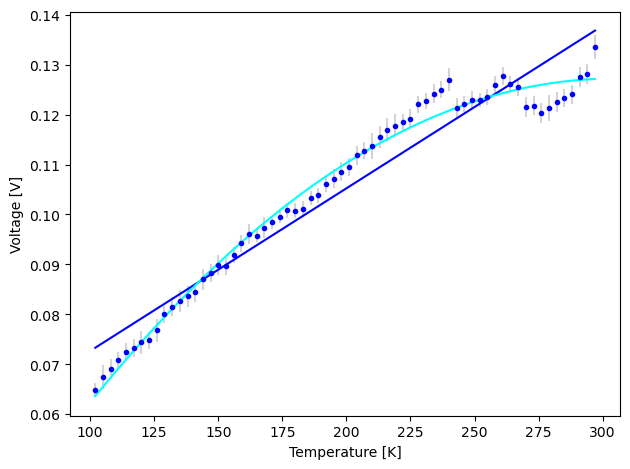

In [290]:
#do the same for the V- 
#plot
#plt.scatter(heating_data_06_binned[:,0], heating_data_06_binned[:,2], s = 1, color = 'blue')

plt.errorbar(heating_data_06_binned[:,0], heating_data_06_binned[:,2], yerr = error_Vminus, fmt = 'o', color = 'blue', ecolor = 'lightgrey', markersize = 3 )
heating_data_binned = np.column_stack((np.arange(90, 350, temp_delta), heating_data_06_binned_Vplus, heating_data_06_binned_Vminus))
heating_data_binned = heating_data_binned[(heating_data_binned[:,0] > 100) & (heating_data_binned[:,0] < 300)]

#polyfit the data with a degree 1 and a degree 2 polynomial
p1 = np.polyfit(heating_data_binned[:,0], heating_data_binned[:,2], 1)
p2 = np.polyfit(heating_data_binned[:,0], heating_data_binned[:,2], 2)

#calculate the mse of the fits
mse1 = np.mean((np.polyval(p1, heating_data_binned[:,0]) - heating_data_binned[:,2])**2)
mse2 = np.mean((np.polyval(p2, heating_data_binned[:,0]) - heating_data_binned[:,2])**2)

print(mse1)
print(mse2)

print('linear fit vminus')
print(p1)
print('quadratic fit vminus')
print(p2)

#plot the fits
plt.plot(heating_data_binned[:,0], np.polyval(p1, heating_data_binned[:,0]), color = 'blue')
plt.plot(heating_data_binned[:,0], np.polyval(p2, heating_data_binned[:,0]), color = 'cyan')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.savefig('heating_curve_06_binned_for_superconductor_fit_Vminus.png')


# Playground with the data 

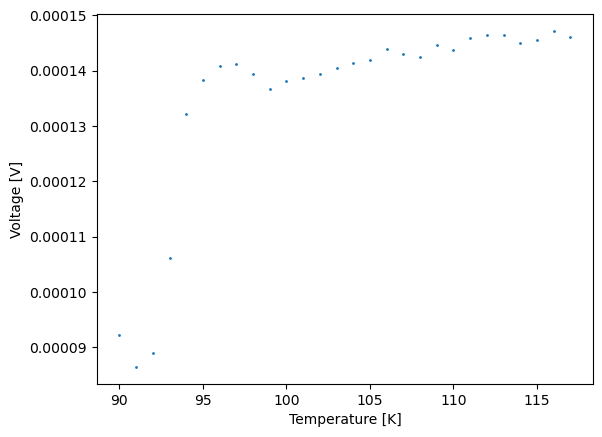

In [291]:
#binn data of measurement 02
#bin the data into bins of size 1 degree
heating_data_02_binned = []

for i in range(90, 350, 1) :
    #get the data for that bin
    data = heating_data_02[(heating_data_02[:,5] > i) & (heating_data_02[:,5] < i + 1)]
    #get the mean of the data
    mean = np.mean(data[:,2])
    heating_data_02_binned.append(mean)
    
#plot the binned data
plt.scatter(range(90, 350, 1), heating_data_02_binned, s = 1)
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()



[9.220327142857143e-05, 8.64423875e-05, 8.89969e-05, 0.00010615842, 0.0001321888, 0.000138384, 0.00014081833333333334, 0.0001411678, 0.000139337875]
3


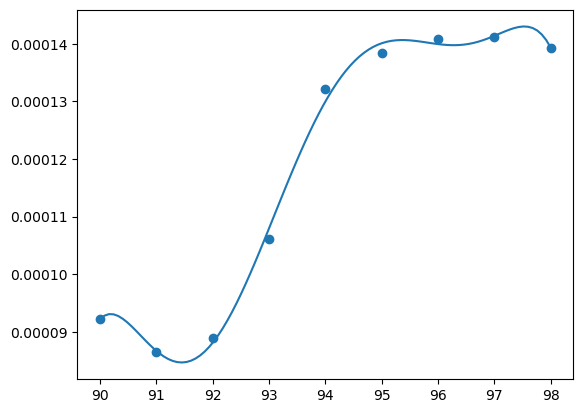

In [292]:
# fit a polynom to the binned data 
#degree 5 
#reduce the number of point to the first 10 
small_sample_mesurement_2 = heating_data_02_binned[:9]

print(small_sample_mesurement_2)

plt.scatter(range(90, 350, 1)[:9],small_sample_mesurement_2)

small_temperatures = range(90, 350, 1)[:9]
#convert to np array
small_temperatures = np.array(small_temperatures)
p = np.polynomial.polynomial.polyfit(small_temperatures, small_sample_mesurement_2, 10)
plt.plot(np.linspace(90,98,100), np.polynomial.polynomial.polyval(np.linspace(90,98,100), p))
#compute where the gradient is the highest
#compute the gradient
gradient = np.gradient(np.polynomial.polynomial.polyval(small_temperatures, p))
#find the maximum of the gradient
#plt.plot(small_temperatures, gradient)
print(np.argmax(gradient))

Text(0, 0.5, 'Voltage [V]')

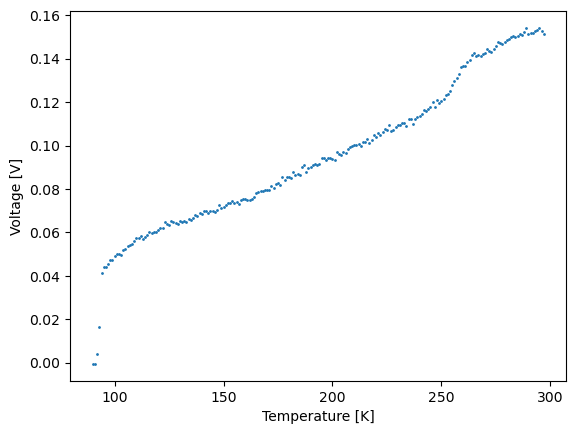

In [293]:
#create a histogram of the data from measurement 06 
#bin the data into bins of size 10 degrees
#heating data
heating_data_06_binned = []
for i in range(90, 350, 1) :
    #get the data for that bin
    data = heating_data_06[(heating_data_06[:,5] > i) & (heating_data_06[:,5] < i + 1)]
    #get the mean of the data
    mean = np.mean(data[:,2])
    heating_data_06_binned.append(mean)

#plot the binned data
plt.scatter(range(90, 350, 1), heating_data_06_binned, s = 1)
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')

# From this data it is visible that the critical temperature shifts to around 90 to 100 K
- to get more beautiful results we will bin the data for the V+ and the V-
- I guess shifting the data and using its difference as an uncertainty is not a good idea or how will we determine 
what the correct shift is ? 
- maybe it is better to caluclate on both the binned data V+ and V- the critical temperature and then take the average
 of both

# V- values printed

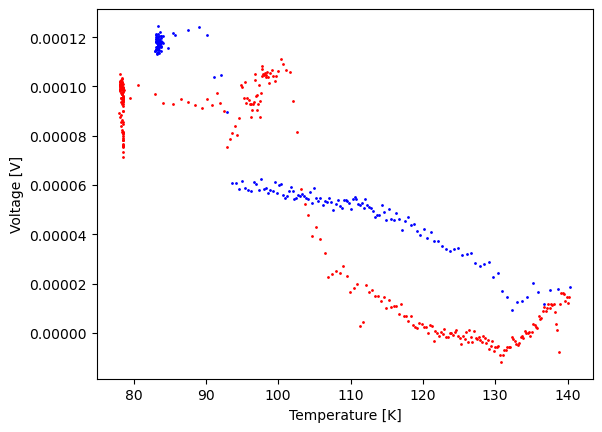

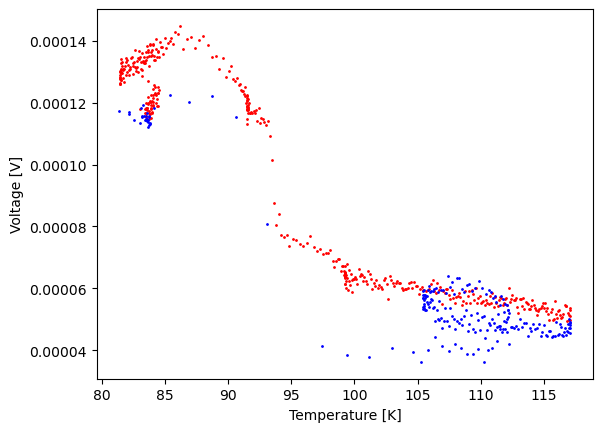

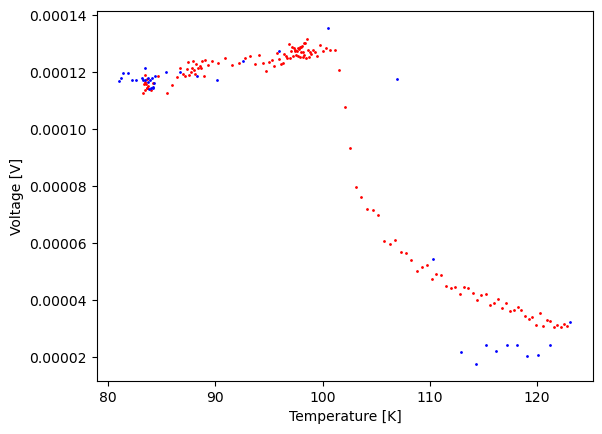

In [294]:
#plot the three curves measured by V- against the temperature for the one without magnetic field
plt.scatter(heating_data_01[:,5], heating_data_01[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_01[:,5], cooling_data_01[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()

plt.scatter(heating_data_02[:,5], heating_data_02[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_02[:,5], cooling_data_02[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()

#create that plot for all the measurement
plt.scatter(heating_data_03[:,5], heating_data_03[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_03[:,5], cooling_data_03[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()


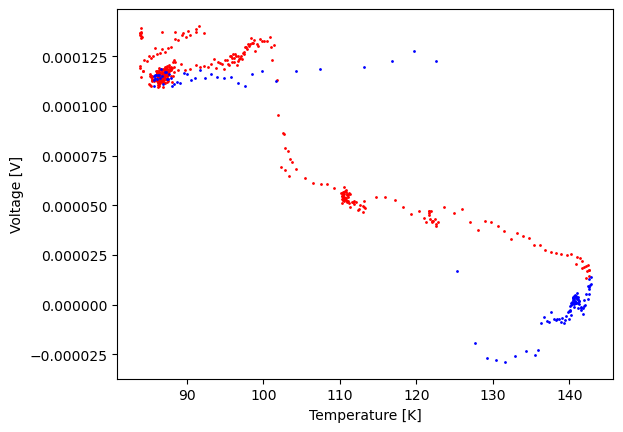

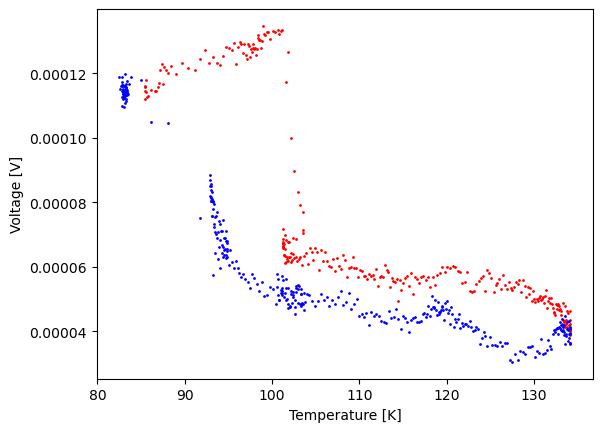

In [295]:
#same for measurement 4 and 5 with the magnetic field
plt.scatter(heating_data_04[:,5], heating_data_04[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_04[:,5], cooling_data_04[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()
    
plt.scatter(heating_data_05[:,5], heating_data_05[:,4], s = 1, color = 'red')
plt.scatter(cooling_data_05[:,5], cooling_data_05[:,4], s = 1, color = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Voltage [V]')
plt.show()


# Weiteres vorgehen 
- Ziel ist es die Kritische temperatur mit und ohne Magnetfeld zu bestimmen
- DAfür bestimmen wir die Kritische Temperatur auf gebinnten daten 
- Die Temperatur sollte auch aus dem Mittelwert von Tbefore und Tafter bestimmt werden
- dann fitten wir zu den beiden Kurven eine Funktion und bestimmen die Kritische Temperatur als der Ort mit dem 
steilsten gradienten.